## Problem Statement:
 **The market for logistics analytics is expected to develop at a CAGR of 17.3 percent from 2019 to 2024, more than doubling in size. This data demonstrates how logistics organizations are understanding the advantages of being able to predict what will happen in the future with a decent degree of certainty. Logistics leaders may use this data to address supply chain difficulties, cut costs, and enhance service levels all at the same time.**

### Importing all the libraries

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Importing Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib                                             
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from bokeh.layouts import column                                    # To build a grid of plots and widgets
from bokeh.plotting import Figure                                   # Create a new figure for plotting
from bokeh.plotting import show                                     # Show the figure result
from bokeh.plotting import output_notebook                          # Helper that enables ouput in the notebook
from bokeh.plotting import output_file                              # Generate output saved to a file when show() is called
from bokeh.models import ColumnDataSource                           # Populate columns by making Ajax calls to REST endpoints
from bokeh.models import CustomJS                                   # Attaches CustomJS callbacks to property change events
from bokeh.models import Slider                                     # For custom JS slider widgets
from bokeh.models import HoverTool                                  # Displays informational tooltips over a glyph
from bokeh.io import push_notebook                                  # Update Bokeh plots in a Jupyter notebook output
output_notebook()
#-------------------------------------------------------------------------------------------------------------------------------
import plotly
from plotly import graph_objs as go                                 # Contains an auto-generated hierarchy of Python classes
from plotly.offline import iplot                                    # Display Figures in offline mode
#-------------------------------------------------------------------------------------------------------------------------------
from ipywidgets import interact                                     # Creates UI controls for exploring code and data
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
#---------------------------------------------------------------------------------------------------------------------------------
# Model selection libraries
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
#---------------------------------------------------------------------------------------------------------------------------------

#-----------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import PowerTransformer
import scipy.stats as stats
#------------------------------------------------------------------------------------------------------------------------------
# Data pre-processing and EDA lib.
from collections import OrderedDict
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
#---------------------------------------------------------------------------------------------------------------------------------------------
# multicolineartiy test and treatment libraries 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

# ML models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor


#Model evaulation libaries 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
#---------------------------
# Unsupervise ML library
from sklearn.cluster import KMeans
#------------------------------------------------

from collections import OrderedDict

Loading BokehJS ...

In [2]:
df = pd.read_csv("real data.csv")#Loading the data 
df.head(2)#It will show the first two records of the data
df.info()#It will show the information about all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [3]:
print("\n      *******  Exploratory Data Analysis on Complete Data Set  *******   \n")
print("-"*90)
print("\n Features Or Columns: {}".format(df.shape[1]),"\n")
print("-"*90)
print("\n No of Records Or Rows: {}".format(df.shape[0]),"\n")
print("-"*90)
print("\n Features Or Columns : \n {} \n".format(df.columns),"\n")
print("-"*90)
print("\n Data Type \n\n {}".format(df.dtypes),"\n")
print("-"*90)
print("\n Contains Nan values in the cells: {}".format(df.isnull().values.any()),"\n")
print("-"*90)
print("\n No of Null values Count \n\n {}".format(df.isnull().sum()),"\n")
print("-"*90)


      *******  Exploratory Data Analysis on Complete Data Set  *******   

------------------------------------------------------------------------------------------

 Features Or Columns: 33 

------------------------------------------------------------------------------------------

 No of Records Or Rows: 10324 

------------------------------------------------------------------------------------------

 Features Or Columns : 
 Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturin

In [4]:
df.head(5)# It shows the first 5 records

ID Project Code            PQ # PO / SO # ASN/DN #        Country  \
0   1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   
1   3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   
2   4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   
3  15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   
4  16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   

  Managed By  Fulfill Via Vendor INCO Term Shipment Mode  \
0   PMO - US  Direct Drop              EXW           Air   
1   PMO - US  Direct Drop              EXW           Air   
2   PMO - US  Direct Drop              FCA           Air   
3   PMO - US  Direct Drop              EXW           Air   
4   PMO - US  Direct Drop              EXW           Air   

  PQ First Sent to Client Date PO Sent to Vendor Date Scheduled Delivery Date  \
0               Pre-PQ Process      Date Not Captured                2-Jun-06   
1               Pre-PQ Process      Date Not Captured               14-Nov-06   
2               Pre-PQ Process      Date Not Captured               27-Aug-06   
3               Pre-PQ Process      Date Not Captured                1-Sep-06   
4               Pre-PQ Process      Date Not Captured               11-Aug-06   

  Delivered to Client Date Delivery Recorded Date Product Group  \
0                 2-Jun-06               2-Jun-06          HRDT   
1                14-Nov-06              14-Nov-06           ARV   
2                27-Aug-06              27-Aug-06          HRDT   
3                 1-Sep-06               1-Sep-06           ARV   
4                11-Aug-06              11-Aug-06           ARV   

  Sub Classification  \
0           HIV test   
1          Pediatric   
2           HIV test   
3              Adult   
4              Adult   

                                                             Vendor  \
0                                       RANBAXY Fine Chemicals LTD.   
1                                          Aurobindo Pharma Limited   
2                                              Abbott GmbH & Co. KG   
3  SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LABORATORIES LIMITED)   
4                                          Aurobindo Pharma Limited   

                                      Item Description  \
0   HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 Tests   
1  Nevirapine 10mg/ml, oral suspension, Bottle, 240 ml   
2       HIV 1/2, Determine Complete HIV Kit, 100 Tests   
3                   Lamivudine 150mg, tablets, 60 Tabs   
4                    Stavudine 30mg, capsules, 60 Caps   

                         Molecule/Test Type      Brand   Dosage  \
0  HIV, Reveal G3 Rapid HIV-1 Antibody Test     Reveal      NaN   
1                                Nevirapine    Generic  10mg/ml   
2       HIV 1/2, Determine Complete HIV Kit  Determine      NaN   
3                                Lamivudine    Generic    150mg   
4                                 Stavudine    Generic     30mg   

       Dosage Form  Unit of Measure (Per Pack)  Line Item Quantity  \
0         Test kit                          30                  19   
1  Oral suspension                         240                1000   
2         Test kit                         100                 500   
3           Tablet                          60               31920   
4          Capsule                          60               38000   

   Line Item Value  Pack Price  Unit Price             Manufacturing Site  \
0        551.00000    29.00000     0.97000     Ranbaxy Fine Chemicals LTD   
1       6200.00000     6.20000     0.03000      Aurobindo Unit III, India   
2      40000.00000    80.00000     0.80000  ABBVIE GmbH & Co.KG Wiesbaden   
3     127360.80000     3.99000     0.07000  Ranbaxy, Paonta Shahib, India   
4     121600.00000     3.20000     0.05000      Aurobindo Unit III, India   

  First Line Designation Weight (Kilograms) Freight Cost (USD)  \
0                    Yes                 13  

In [5]:
df[df.duplicated()].values.any()#checking for duplicate records

False

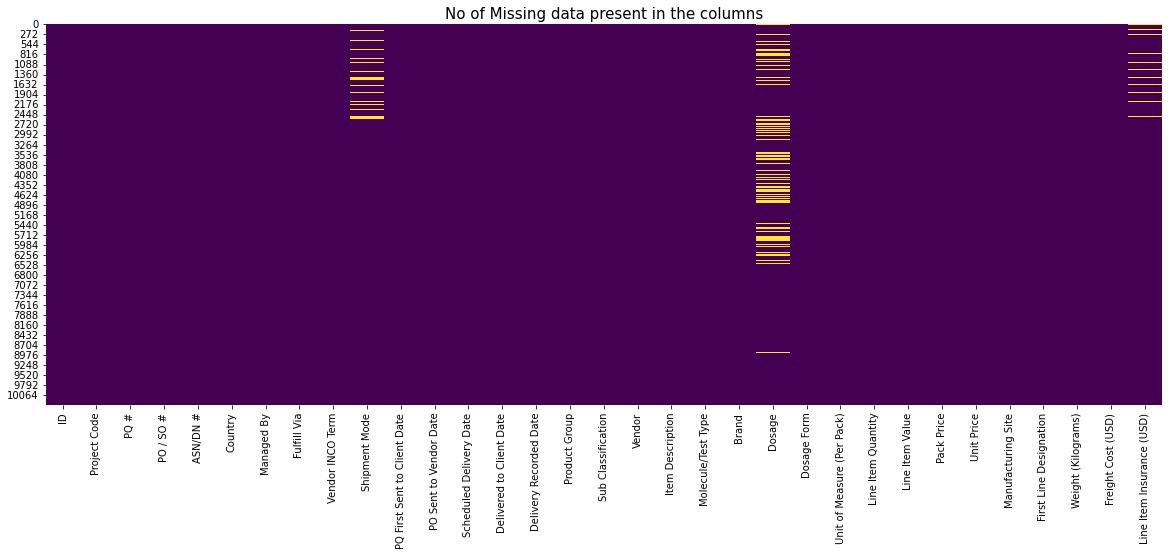

In [6]:
plt.figure(figsize=(20,7))#It gives out the figure size
sns.heatmap(df.isnull(),cmap='viridis',cbar=False)#Generating heatmap for null values
plt.title("No of Missing data present in the columns",fontsize = 15)#It gives out the title of the data
plt.show()#for displaying

### Observation
 - As from above heatmap the columns Shipment Mode,Dosage and Line Item Insurance(USD) are having the null values

In [7]:
df.columns#It will display all the column names of the data

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [8]:
df.columns = df.columns.str.lower()#changing all the column name into the lower case

In [9]:
df.columns#It will display all the column names of the data

Index(['id', 'project code', 'pq #', 'po / so #', 'asn/dn #', 'country',
       'managed by', 'fulfill via', 'vendor inco term', 'shipment mode',
       'pq first sent to client date', 'po sent to vendor date',
       'scheduled delivery date', 'delivered to client date',
       'delivery recorded date', 'product group', 'sub classification',
       'vendor', 'item description', 'molecule/test type', 'brand', 'dosage',
       'dosage form', 'unit of measure (per pack)', 'line item quantity',
       'line item value', 'pack price', 'unit price', 'manufacturing site',
       'first line designation', 'weight (kilograms)', 'freight cost (usd)',
       'line item insurance (usd)'],
      dtype='object')

In [10]:
df.columns = df.columns.str.replace(" ","_")#Replacing the spaces with underscore using the repalce function

In [11]:
df.columns #It will display all the column names of the data

Index(['id', 'project_code', 'pq_#', 'po_/_so_#', 'asn/dn_#', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'line_item_value', 'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'freight_cost_(usd)',
       'line_item_insurance_(usd)'],
      dtype='object')

In [12]:
#showing up the missing data
for i in df.columns:
    if df[i].isnull().sum()> 0:
        print("\n")
        print(i,"has missing data of",df[i].isnull().sum())
        print("-"*45)



shipment_mode has missing data of 360
---------------------------------------------


dosage has missing data of 1736
---------------------------------------------


line_item_insurance_(usd) has missing data of 287
---------------------------------------------


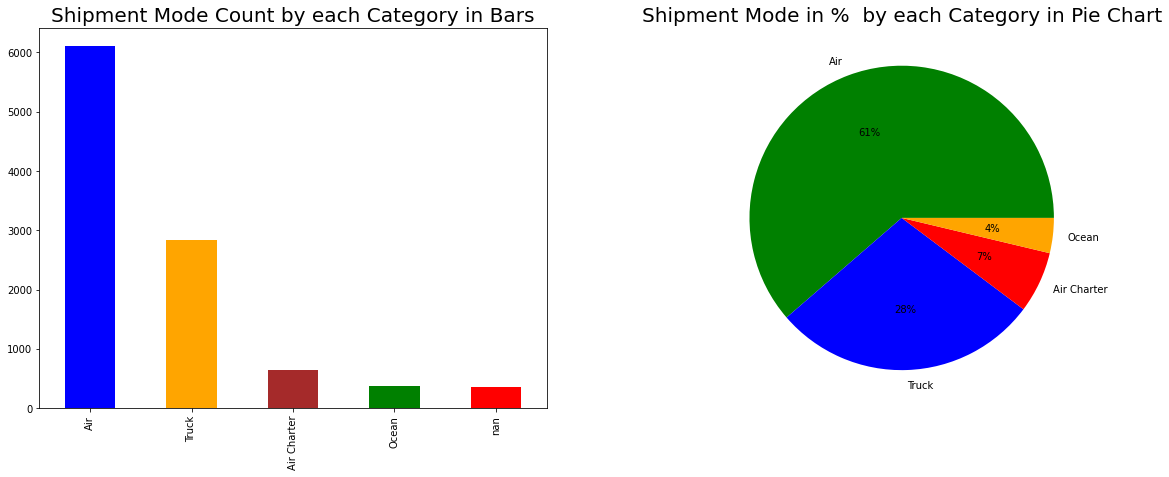

In [13]:
fig=plt.figure(figsize=(20,7))
ax=fig.add_subplot(121)
df["shipment_mode"].value_counts(dropna=False).plot.bar(color=['blue','orange', 'brown', 'green', 'red'])
plt.title("Shipment Mode Count by each Category in Bars",fontsize = 20)

ax1=fig.add_subplot(122)
plt.pie(df["shipment_mode"].value_counts(),labels = ['Air','Truck','Air Charter','Ocean'],colors = ['green','blue','red','orange', 'brown'],autopct = "%.0f%%")
plt.title("Shipment Mode in %  by each Category in Pie Chart",fontsize=20)
plt.show()

### Observation:
 - from the left bar chart or plot,we can say that most of the shipment mode done by Air and then followed by Truck.
 - from the right pie chart shows that the shipment mode composition 61% for Air,28% for Truck,7% Air charter,4% for Ocean.

In [14]:
df["shipment_mode"].isnull().sum()#There are 360 null in the shipment mode 

360

In [15]:
df["shipment_mode"].value_counts()#It shows the values of the each category of the shipment mode

Air            6113
Truck          2830
Air Charter     650
Ocean           371
Name: shipment_mode, dtype: int64

In [16]:
df["shipment_mode"].mode()[0]#It will get the most occurence category from the shipmode 

'Air'

In [17]:
df["shipment_mode"].fillna(df["shipment_mode"].mode()[0],inplace = True)#replacing the missing 360 values with most occurence value i.e., value 'Air'

In [18]:
#df["shipment_mode"].value_counts(dropna=False)

In [19]:
df["shipment_mode"].isnull().any()#after replacing there are no null values are there in the shipment mode column

False

In [20]:
df["dosage"].isnull().sum()# Dosage column is having the 1736 null values

1736

In [21]:
df["dosage"].isnull().sum()/len(df)*100#It is showing the percentage of the null values

16.815187911662147

In [22]:
df["dosage"].value_counts()#It shows the values of the each category of the Dosage

300mg              990
200mg              932
600mg              772
150/300mg          600
150/300/200mg      580
10mg/ml            552
150mg              431
200/50mg           395
300/300mg          301
600/300/300mg      286
150/200/30mg       250
100mg              228
50mg               174
200/300mg          160
80/20mg/ml         158
400mg              156
20mg/ml            152
30mg               144
600/200/300mg      139
150/30mg           133
30/50/60mg         127
300/200mg           94
30/60mg             89
250mg               88
60/30mg             73
100/25mg            73
600/300mg           63
300/100mg           54
1mg/ml              54
20mg                43
25mg                39
15mg                38
30mg/ml             33
300/150/300mg       28
30/50/6mg           19
30/6mg              14
80mg/ml             13
500/25mg            13
60/100/12mg         12
20/120mg            12
2g                  11
500mg               10
150/300+200mg        8
150/300mg+6

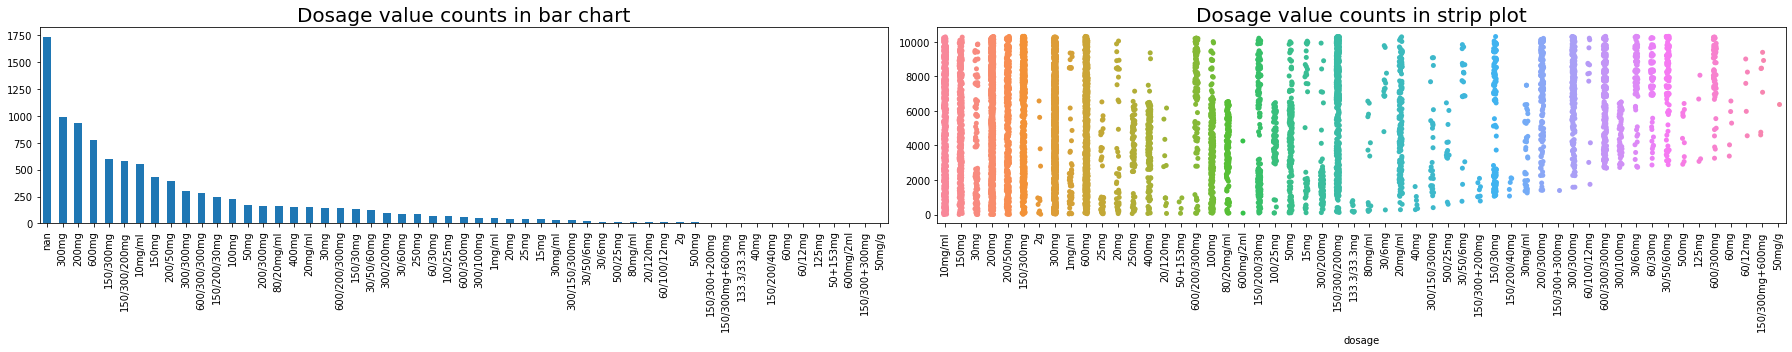

In [23]:
fig=plt.figure(figsize=(25,5))
ax0 = fig.add_subplot(121)
df["dosage"].value_counts(dropna=False).plot.bar()
plt.title("Dosage value counts in bar chart",fontsize = 20)

ax1 = fig.add_subplot(122)
x = df["dosage"]
y = df.index
plt.xticks(rotation=90)
sns.stripplot(x = x, y = y)
plt.title("Dosage value counts in strip plot",fontsize = 20)
plt.tight_layout()
plt.show()

### Observation:
 - The left side bar plot shows the category wise distribtion 
 - The Right side strip plot shows the scattered data points 

In [24]:
df["line_item_insurance_(usd)"].value_counts()# It shows value counts of the Line iten insurance

0.00000       54
0.02000       37
0.07000       33
0.06000       30
0.05000       30
0.01000       26
0.03000       23
0.09000       21
0.08000       20
0.15000       18
0.26000       18
0.13000       18
0.49000       18
0.12000       18
0.24000       18
0.44000       17
0.14000       17
0.34000       16
0.17000       15
0.42000       15
0.10000       15
0.25000       15
0.38000       15
0.19000       15
0.28000       15
0.29000       15
342.39000     15
0.18000       14
0.30000       14
0.04000       14
330.00000     13
0.31000       13
0.20000       13
5.12000       13
0.35000       12
0.96000       12
0.54000       12
0.51000       12
1.03000       11
0.99000       11
0.71000       11
0.52000       11
0.82000       11
0.23000       11
0.16000       11
1.10000       10
0.57000       10
320.00000     10
31.36000      10
0.41000       10
0.22000       10
36.96000      10
0.67000       10
0.64000       10
0.60000        9
0.86000        9
0.37000        9
1.92000        9
1.16000       

In [25]:
df["line_item_insurance_(usd)"].describe()#It is a Generate descriptive statistics

count   10037.00000
mean      240.11763
std       500.19057
min         0.00000
25%         6.51000
50%        47.04000
75%       252.40000
max      7708.44000
Name: line_item_insurance_(usd), dtype: float64

In [26]:
df["line_item_insurance_(usd)"].fillna(0,inplace=True)#Filling the missing values with zero using fillna function.

In [27]:
df["line_item_insurance_(usd)"].value_counts(dropna=False)#After replacing the value counts of line item insurance

0.00000       341
0.02000        37
0.07000        33
0.06000        30
0.05000        30
0.01000        26
0.03000        23
0.09000        21
0.08000        20
0.49000        18
0.15000        18
0.12000        18
0.26000        18
0.24000        18
0.13000        18
0.44000        17
0.14000        17
0.34000        16
0.29000        15
0.17000        15
342.39000      15
0.28000        15
0.10000        15
0.38000        15
0.25000        15
0.42000        15
0.19000        15
0.18000        14
0.04000        14
0.30000        14
0.31000        13
0.20000        13
5.12000        13
330.00000      13
0.54000        12
0.96000        12
0.51000        12
0.35000        12
0.16000        11
0.71000        11
0.82000        11
0.23000        11
0.99000        11
1.03000        11
0.52000        11
36.96000       10
0.57000        10
0.41000        10
1.10000        10
0.67000        10
31.36000       10
0.64000        10
0.22000        10
320.00000      10
0.86000         9
0.46000   

In [28]:
len(df["line_item_insurance_(usd)"])#the length of the line item insurance

10324

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            10324 non-null  int64  
 1   project_code                  10324 non-null  object 
 2   pq_#                          10324 non-null  object 
 3   po_/_so_#                     10324 non-null  object 
 4   asn/dn_#                      10324 non-null  object 
 5   country                       10324 non-null  object 
 6   managed_by                    10324 non-null  object 
 7   fulfill_via                   10324 non-null  object 
 8   vendor_inco_term              10324 non-null  object 
 9   shipment_mode                 10324 non-null  object 
 10  pq_first_sent_to_client_date  10324 non-null  object 
 11  po_sent_to_vendor_date        10324 non-null  object 
 12  scheduled_delivery_date       10324 non-null  object 
 13  d

### Function for displaying the outliers and statistics

In [30]:
def Custome_Summary(my_df):
    result = []
    for col in my_df.columns:
        if my_df[col].dtypes != 'object':
            stats = OrderedDict({
                "Feature Name" :col,
                "Count": my_df[col].count(),
                "Minimum": my_df[col].min(),
                "Quartile1" : my_df[col].quantile(0.25),
                "Quartile2" : my_df[col].quantile(0.50),
                "Quartile3" : my_df[col].quantile(0.75),
                "Mean": my_df[col].mean(),
                "Variance": round(my_df[col].var()),
                "Standar_Deviation": my_df[col].std(),
                "Skewness" : my_df[col].skew(),
                "Kurtosis" : my_df[col].kurt()
                
                
            })
            result.append(stats)
    result_df = pd.DataFrame(result)
    #Skwness type :
    Skwness_lable  = []
    for i in result_df["Skewness"]:
        if i <=-1 :
            Skwness_lable.append("Highly negative skew ")
        elif -1 < i <= -0.5:
            Skwness_lable.append("Moderately  negative skew ")
    
        elif -0.5 < i < 0:
            Skwness_lable.append(" Fairly  negative skew ")
        elif 0 <= i < 0.5:
            Skwness_lable.append(" Fairly  Postive skew ")
        elif 0.5 <= i < 1:
            Skwness_lable.append(" Moderately Positive  skew ")
        elif i >= 1:
            Skwness_lable.append("Highly Positive  skew ")
        
    result_df["Skewness Comment "] = Skwness_lable 
     
    #Kurto type :
    Kurtosis_lable  = []
    for i in result_df["Kurtosis"]:
        if i >=  1 :
            Kurtosis_lable.append("Lepto  ")
        elif i <= -1:
            Kurtosis_lable.append("Plato  ")
        else :
            Kurtosis_lable.append(" Meso  ")
        
    result_df["Kurtosis Comment "] =  Kurtosis_lable 
    
    
    Outliers_lable = []
    for col in my_df.columns:
        if my_df[col].dtypes != 'object':
            Q1 = my_df[col].quantile(0.25)
            Q2 = my_df[col].quantile(0.50)
            Q3 = my_df[col].quantile(0.75)
            IQR = Q3 - Q1
            LW = Q1 - 1.5*IQR
            UW = Q3 + 1.5*IQR
            if len(my_df[(my_df[col]< LW)|(my_df[col] > UW)]) > 0:
                Outliers_lable.append("Have outliers")
            else:
                Outliers_lable.append("No Outliers")
    result_df["Outlier Comment"] = Outliers_lable
    
    return  result_df

In [31]:
Custome_Summary(df)#calling the function

Feature Name  Count  Minimum   Quartile1   Quartile2  \
0                          id  10324  1.00000 12795.75000 57540.50000   
1  unit_of_measure_(per_pack)  10324  1.00000    30.00000    60.00000   
2          line_item_quantity  10324  1.00000   408.00000  3000.00000   
3             line_item_value  10324  0.00000  4314.59250 30471.46500   
4                  pack_price  10324  0.00000     4.12000     9.30000   
5                  unit_price  10324  0.00000     0.08000     0.16000   
6   line_item_insurance_(usd)  10324  0.00000     5.24250    42.81500   

     Quartile3         Mean      Variance  Standar_Deviation  Skewness  \
0  83648.25000  51098.96823    1020440379        31944.33250  -0.23037   
1     90.00000     77.99090          5864           76.57976   4.30250   
2  17039.75000  18332.53487    1602825483        40035.30296   5.03831   
3 166447.14000 157650.56735  119226611519       345292.06698   5.83702   
4     23.59250     21.91024          2080           45.60922  12.98843   
5      0.47000      0.61170            11            3.27581  40.58485   
6    241.75000    233.44252        244793          494.76581   4.88630   

    Kurtosis        Skewness Comment  Kurtosis Comment  Outlier Comment  
0   -1.63984   Fairly  negative skew            Plato       No Outliers  
1   36.09400   Highly Positive  skew            Lepto     Have outliers  
2   40.05030   Highly Positive  skew            Lepto     Have outliers  
3   54.15243   Highly Positive  skew            Lepto     Have outliers  
4  293.17620   Highly Positive  skew            Lepto     Have outliers  
5 2725.96025   Highly Positive  skew            Lepto     Have outliers  
6   35.76408   Highly Positive  skew            Lepto     Have outliers

### Observation:
 - There are no outliers in the id and there are outliers in unit_of_measure,line iten quantity etc.

In [32]:
df.head(5)

id project_code            pq_# po_/_so_# asn/dn_#        country  \
0   1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   
1   3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   
2   4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   
3  15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   
4  16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   

  managed_by  fulfill_via vendor_inco_term shipment_mode  \
0   PMO - US  Direct Drop              EXW           Air   
1   PMO - US  Direct Drop              EXW           Air   
2   PMO - US  Direct Drop              FCA           Air   
3   PMO - US  Direct Drop              EXW           Air   
4   PMO - US  Direct Drop              EXW           Air   

  pq_first_sent_to_client_date po_sent_to_vendor_date scheduled_delivery_date  \
0               Pre-PQ Process      Date Not Captured                2-Jun-06   
1               Pre-PQ Process      Date Not Captured               14-Nov-06   
2               Pre-PQ Process      Date Not Captured               27-Aug-06   
3               Pre-PQ Process      Date Not Captured                1-Sep-06   
4               Pre-PQ Process      Date Not Captured               11-Aug-06   

  delivered_to_client_date delivery_recorded_date product_group  \
0                 2-Jun-06               2-Jun-06          HRDT   
1                14-Nov-06              14-Nov-06           ARV   
2                27-Aug-06              27-Aug-06          HRDT   
3                 1-Sep-06               1-Sep-06           ARV   
4                11-Aug-06              11-Aug-06           ARV   

  sub_classification  \
0           HIV test   
1          Pediatric   
2           HIV test   
3              Adult   
4              Adult   

                                                             vendor  \
0                                       RANBAXY Fine Chemicals LTD.   
1                                          Aurobindo Pharma Limited   
2                                              Abbott GmbH & Co. KG   
3  SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LABORATORIES LIMITED)   
4                                          Aurobindo Pharma Limited   

                                      item_description  \
0   HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 Tests   
1  Nevirapine 10mg/ml, oral suspension, Bottle, 240 ml   
2       HIV 1/2, Determine Complete HIV Kit, 100 Tests   
3                   Lamivudine 150mg, tablets, 60 Tabs   
4                    Stavudine 30mg, capsules, 60 Caps   

                         molecule/test_type      brand   dosage  \
0  HIV, Reveal G3 Rapid HIV-1 Antibody Test     Reveal      NaN   
1                                Nevirapine    Generic  10mg/ml   
2       HIV 1/2, Determine Complete HIV Kit  Determine      NaN   
3                                Lamivudine    Generic    150mg   
4                                 Stavudine    Generic     30mg   

       dosage_form  unit_of_measure_(per_pack)  line_item_quantity  \
0         Test kit                          30                  19   
1  Oral suspension                         240                1000   
2         Test kit                         100                 500   
3           Tablet                          60               31920   
4          Capsule                          60               38000   

   line_item_value  pack_price  unit_price             manufacturing_site  \
0        551.00000    29.00000     0.97000     Ranbaxy Fine Chemicals LTD   
1       6200.00000     6.20000     0.03000      Aurobindo Unit III, India   
2      40000.00000    80.00000     0.80000  ABBVIE GmbH & Co.KG Wiesbaden   
3     127360.80000     3.99000     0.07000  Ranbaxy, Paonta Shahib, India   
4     121600.00000     3.20000     0.05000      Aurobindo Unit III, India   

  first_line_designation weight_(kilograms) freight_cost_(usd)  \
0                    Yes                 13  

In [33]:
df.dtypes#It will shows the data types of all trhe columns

id                                int64
project_code                     object
pq_#                             object
po_/_so_#                        object
asn/dn_#                         object
country                          object
managed_by                       object
fulfill_via                      object
vendor_inco_term                 object
shipment_mode                    object
pq_first_sent_to_client_date     object
po_sent_to_vendor_date           object
scheduled_delivery_date          object
delivered_to_client_date         object
delivery_recorded_date           object
product_group                    object
sub_classification               object
vendor                           object
item_description                 object
molecule/test_type               object
brand                            object
dosage                           object
dosage_form                      object
unit_of_measure_(per_pack)        int64
line_item_quantity                int64


In [34]:
object_columns = [ i for i in df.columns if df[i].dtypes == "object"]#getting out the categorical columns
numerical_columns = [i for i in df.columns if df[i].dtypes == 'int64' or df[i].dtypes == 'float64']#getting out the numerical columns

### Function for unique value counts of every column

In [35]:
def unique_value_count(columns):
    unique_values = dict()
    for i in object_columns:
        unique_values[i] = df[i].nunique()
    return unique_values

In [36]:
unique_value_count(df.columns)#calling the function

{'project_code': 142,
 'pq_#': 1237,
 'po_/_so_#': 6233,
 'asn/dn_#': 7030,
 'country': 43,
 'managed_by': 4,
 'fulfill_via': 2,
 'vendor_inco_term': 8,
 'shipment_mode': 4,
 'pq_first_sent_to_client_date': 765,
 'po_sent_to_vendor_date': 897,
 'scheduled_delivery_date': 2006,
 'delivered_to_client_date': 2093,
 'delivery_recorded_date': 2042,
 'product_group': 5,
 'sub_classification': 6,
 'vendor': 73,
 'item_description': 184,
 'molecule/test_type': 86,
 'brand': 48,
 'dosage': 54,
 'dosage_form': 17,
 'manufacturing_site': 88,
 'first_line_designation': 2,
 'weight_(kilograms)': 4688,
 'freight_cost_(usd)': 6733}

In [37]:
df["po_/_so_#"].value_counts()

SCMS-199289    67
SCMS-199283    63
SCMS-183950    55
SCMS-215370    38
SCMS-259075    38
SCMS-259079    33
SCMS-215410    26
SCMS-23500     26
SCMS-259078    20
SCMS-162440    20
SCMS-16600     18
SCMS-19800     18
SCMS-259072    17
SCMS-259074    17
SCMS-238550    17
SCMS-71370     17
SO-298         17
SCMS-272160    17
SCMS-238555    17
SCMS-14050     16
SCMS-267020    16
SCMS-196561    16
SCMS-295800    16
SCMS-238554    16
SCMS-259077    16
SCMS-259073    15
SCMS-199280    15
SCMS-280220    15
SCMS-60170     15
SCMS-238552    15
SCMS-280210    15
SCMS-33320     15
SCMS-41190     15
SCMS-259071    15
SCMS-28830     14
SCMS-272170    14
SCMS-253260    14
SCMS-54980     14
SCMS-238551    14
SCMS-238553    14
SO-44400       13
SCMS-83790     13
SCMS-41140     13
SCMS-238556    13
SO-1039        12
SCMS-259076    12
SCMS-83770     12
SCMS-68980     11
SCMS-240830    11
SO-47630       11
SCMS-204300    11
SO-37150       11
SCMS-239410    11
SCMS-83830     11
SO-48850       10
SO-42340  

### spliting out the SCM from PO AND SO using function reorder

In [38]:
def reorder(data):
    data_split=data.split("-")
    data_return=data_split[0]
    return data_return

In [39]:
df["po_/_so_#"] = df["po_/_so_#"].apply(reorder)#calling the function

In [40]:
df["po_/_so_#"].value_counts()

SO      5404
SCMS    4919
DSCM       1
Name: po_/_so_#, dtype: int64

In [41]:
df["asn/dn_#"].value_counts()

ASN-19166    54
ASN-24415    38
ASN-23875    26
ASN-32138    19
ASN-28034    17
ASN-30792    17
ASN-28036    17
DN-304       17
ASN-28033    17
ASN-1520     16
ASN-7373     16
ASN-29764    16
ASN-2293     16
ASN-1665     16
ASN-28037    16
ASN-31750    15
ASN-3732     15
ASN-27976    15
ASN-27980    15
ASN-24433    15
ASN-1251     15
ASN-27979    15
ASN-32231    15
ASN-27978    15
ASN-28021    14
ASN-33852    14
ASN-30671    14
ASN-26882    14
ASN-29257    14
ASN-28279    14
ASN-31070    14
ASN-3553     14
ASN-30377    14
ASN-3752     13
ASN-32122    13
ASN-33865    13
DN-3015      13
ASN-33851    13
ASN-31854    13
ASN-33470    13
ASN-29597    12
ASN-33477    12
DN-2035      11
ASN-26738    11
ASN-32524    11
DN-3561      11
ASN-2503     10
ASN-3607     10
ASN-5933     10
DN-3843      10
DN-332       10
ASN-5373     10
ASN-24721    10
DN-2812      10
ASN-28627    10
DN-2981      10
DN-2090       9
DN-2025       9
DN-3017       9
DN-373        9
DN-475        9
DN-1311       9
DN-1452 

In [42]:
df["asn/dn_#"] = df["asn/dn_#"].apply(reorder)# same function applying for asn/dn

In [43]:
df["asn/dn_#"].value_counts()

DN     5404
ASN    4920
Name: asn/dn_#, dtype: int64

In [44]:
df["country"].value_counts()

South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Mali                    17
Guatemala               15
Pakistan                15
Malawi                  14
Benin                   13
Lebanon                  8
Libya                    8
Angola                   7
Liberia                  6
Sierra Leone             4
Lesotho                  4
Senegal                  3
Togo                     3
A

In [45]:
df["managed_by"].value_counts()

PMO - US                     10265
South Africa Field Office       57
Haiti Field Office               1
Ethiopia Field Office            1
Name: managed_by, dtype: int64

In [46]:
print(df["managed_by"].value_counts()/len(df)*100)

PMO - US                    99.42852
South Africa Field Office    0.55211
Haiti Field Office           0.00969
Ethiopia Field Office        0.00969
Name: managed_by, dtype: float64


In [47]:
df.columns

Index(['id', 'project_code', 'pq_#', 'po_/_so_#', 'asn/dn_#', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'line_item_value', 'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'freight_cost_(usd)',
       'line_item_insurance_(usd)'],
      dtype='object')

In [48]:
df["vendor_inco_term"].value_counts()

N/A - From RDC    5404
EXW               2778
DDP               1443
FCA                397
CIP                275
DDU                 15
DAP                  9
CIF                  3
Name: vendor_inco_term, dtype: int64

In [49]:
df["pq_first_sent_to_client_date"].value_counts()

Pre-PQ Process       2476
Date Not Captured     205
9/11/14               205
7/11/13               173
4/30/14               123
11/6/09                98
11/21/11               90
3/10/11                89
3/18/10                78
8/31/10                75
2/10/10                72
3/18/13                64
10/13/10               62
12/13/12               56
10/21/13               53
5/7/09                 52
8/9/13                 51
12/8/09                49
10/4/11                48
8/29/11                46
3/1/12                 46
1/16/13                46
4/19/10                44
4/19/13                43
6/23/10                43
9/11/12                43
12/29/14               42
10/23/09               40
10/8/13                39
11/26/10               39
5/15/12                39
12/8/11                38
5/6/13                 37
10/22/14               36
10/15/09               36
8/22/11                36
12/14/12               36
10/5/12                35
11/15/12    

In [50]:
df["pq_first_sent_to_client_date"].nunique()

765

In [51]:
df["pq_first_sent_to_client_date"].min()

'1/10/12'

In [52]:
df["pq_first_sent_to_client_date"].max()

'Pre-PQ Process'

In [53]:
df["pq_first_sent_to_client_date"]

0           Pre-PQ Process
1           Pre-PQ Process
2           Pre-PQ Process
3           Pre-PQ Process
4           Pre-PQ Process
5           Pre-PQ Process
6           Pre-PQ Process
7           Pre-PQ Process
8           Pre-PQ Process
9           Pre-PQ Process
10          Pre-PQ Process
11          Pre-PQ Process
12          Pre-PQ Process
13          Pre-PQ Process
14          Pre-PQ Process
15          Pre-PQ Process
16          Pre-PQ Process
17          Pre-PQ Process
18          Pre-PQ Process
19          Pre-PQ Process
20          Pre-PQ Process
21          Pre-PQ Process
22          Pre-PQ Process
23          Pre-PQ Process
24          Pre-PQ Process
25          Pre-PQ Process
26          Pre-PQ Process
27          Pre-PQ Process
28          Pre-PQ Process
29          Pre-PQ Process
30          Pre-PQ Process
31          Pre-PQ Process
32          Pre-PQ Process
33          Pre-PQ Process
34          Pre-PQ Process
35          Pre-PQ Process
36          Pre-PQ Process
3

### Function for the changing the format of the date columns

In [54]:
def client_dates(date):
    if date=="Pre-PQ Process":
        return pd.to_datetime('01/06/2009',format="%d/%m/%Y")
    elif date=="Date Not Captured":
        return "Date Not Captured"
    else:
        if len(date)<9:
            date=pd.to_datetime(date,format="%m/%d/%y")
            return date
        else:
            date=date.replace("-","/")
            date=pd.to_datetime(date,format="%d/%m/%Y")
            return date

In [55]:
df["pq_first_sent_to_client_date"] = df["pq_first_sent_to_client_date"].apply(client_dates)#calling the function

In [56]:
df["pq_first_sent_to_client_date"].value_counts()

2009-06-01 00:00:00    2476
Date Not Captured       205
2014-09-11 00:00:00     205
2013-07-11 00:00:00     173
2014-04-30 00:00:00     123
2009-11-06 00:00:00      98
2011-11-21 00:00:00      90
2011-03-10 00:00:00      89
2010-03-18 00:00:00      78
2010-08-31 00:00:00      75
2010-02-10 00:00:00      72
2013-03-18 00:00:00      64
2010-10-13 00:00:00      62
2012-12-13 00:00:00      56
2013-10-21 00:00:00      53
2009-05-07 00:00:00      52
2013-08-09 00:00:00      51
2009-12-08 00:00:00      49
2011-10-04 00:00:00      48
2011-08-29 00:00:00      46
2012-03-01 00:00:00      46
2013-01-16 00:00:00      46
2010-04-19 00:00:00      44
2013-04-19 00:00:00      43
2010-06-23 00:00:00      43
2012-09-11 00:00:00      43
2014-12-29 00:00:00      42
2009-10-23 00:00:00      40
2013-10-08 00:00:00      39
2010-11-26 00:00:00      39
2012-05-15 00:00:00      39
2011-12-08 00:00:00      38
2013-05-06 00:00:00      37
2014-10-22 00:00:00      36
2009-10-15 00:00:00      36
2011-08-22 00:00:00 

In [57]:
df["po_sent_to_vendor_date"].value_counts()

N/A - From RDC       5404
Date Not Captured     328
8/27/14                80
3/19/10                78
8/29/14                76
10/9/14                71
12/2/13                67
9/24/10                53
2/20/15                43
5/11/15                40
12/14/10               34
3/24/11                34
6/17/10                32
4/2/09                 32
3/28/11                32
4/30/14                31
3/27/09                29
7/10/13                27
6/2/14                 26
7/21/09                26
10/16/12               25
2/17/15                25
1/23/12                24
11/14/14               23
6/5/09                 23
1/26/15                23
6/12/12                23
5/8/14                 22
4/21/10                21
9/21/10                21
3/10/14                21
8/13/13                20
8/23/13                20
12/23/09               19
2/20/08                19
8/6/13                 19
3/31/08                19
12/24/14               19
9/22/09     

In [58]:
df["scheduled_delivery_date"].value_counts()

29-Aug-14    97
16-Mar-12    83
27-Aug-14    63
31-May-10    62
31-Jan-14    60
30-Sep-14    57
16-Apr-13    56
15-Jul-10    55
19-Apr-10    53
30-Jun-15    51
24-Aug-15    51
30-Jun-14    50
12-May-15    42
30-Jan-15    42
31-Mar-11    40
6-Feb-14     39
20-Aug-08    36
25-Jun-09    36
24-Jul-15    36
30-May-14    32
2-Aug-12     31
31-Oct-14    31
31-Oct-13    31
30-Apr-13    31
2-Jul-15     30
28-Nov-14    30
30-Mar-12    30
30-Nov-10    29
31-Aug-10    29
30-Jun-10    29
31-Mar-15    28
31-Jan-11    28
30-Apr-15    27
13-Jan-14    27
27-Feb-15    26
30-Apr-14    26
21-Sep-07    26
30-Sep-10    26
30-Nov-12    25
31-Mar-09    25
16-Feb-15    25
28-Feb-14    24
16-Jun-09    24
31-Dec-13    24
30-Sep-13    24
20-Jun-12    24
29-May-15    24
7-Nov-13     24
9-Jan-13     24
29-Nov-13    23
21-Jan-08    23
31-Jul-14    23
31-May-13    22
31-Mar-14    22
18-Dec-09    22
30-Sep-11    22
10-Dec-14    21
29-Jan-08    21
23-Jul-15    21
31-May-11    21
31-Oct-12    20
9-Apr-13     20
13-Aug-1

In [59]:
df.columns

Index(['id', 'project_code', 'pq_#', 'po_/_so_#', 'asn/dn_#', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'line_item_value', 'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'freight_cost_(usd)',
       'line_item_insurance_(usd)'],
      dtype='object')

In [60]:
df['scheduled_delivery_date'] = pd.to_datetime(df['scheduled_delivery_date'])#changing the data time datatype
df['delivered_to_client_date'] = pd.to_datetime(df['delivered_to_client_date'])#changing the data time datatype
df['delivery_recorded_date'] = pd.to_datetime(df['delivery_recorded_date'])#changing the data time datatype

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            10324 non-null  int64         
 1   project_code                  10324 non-null  object        
 2   pq_#                          10324 non-null  object        
 3   po_/_so_#                     10324 non-null  object        
 4   asn/dn_#                      10324 non-null  object        
 5   country                       10324 non-null  object        
 6   managed_by                    10324 non-null  object        
 7   fulfill_via                   10324 non-null  object        
 8   vendor_inco_term              10324 non-null  object        
 9   shipment_mode                 10324 non-null  object        
 10  pq_first_sent_to_client_date  10324 non-null  object        
 11  po_sent_to_vendor_date      

In [62]:
df.columns

Index(['id', 'project_code', 'pq_#', 'po_/_so_#', 'asn/dn_#', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'line_item_value', 'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'freight_cost_(usd)',
       'line_item_insurance_(usd)'],
      dtype='object')

In [63]:
df['weight_(kilograms)'].value_counts()

Weight Captured Separately    1507
2                               29
6                               26
1                               23
60                              20
5                               20
4                               19
3                               18
14                              17
21                              17
18                              17
12                              17
17                              17
9                               17
39                              17
36                              17
25                              16
22                              16
76                              16
See DN-304 (ID#:10589)          16
7                               16
58                              16
15                              15
46                              15
54                              15
13                              15
24                              15
30                              15
16                  

In [64]:
df['freight_cost_(usd)'].value_counts()

Freight Included in Commodity Cost    1442
Invoiced Separately                    239
9736.1                                  36
6147.18                                 27
13398.06                                16
See DN-304 (ID#:10589)                  16
7445.8                                  16
9341.49                                 15
See ASN-32231 (ID#:13648)               14
See ASN-31750 (ID#:19272)               14
See ASN-28279 (ID#:13547)               13
7329.83                                 12
See DN-3015 (ID#:82554)                 12
1211.48                                 11
25231.96                                11
17090                                   10
15322.73                                10
15459.09                                10
15128.37                                10
See DN-2035 (ID#:82356)                 10
14547.55                                10
See ASN-26738 (ID#:15115)               10
16532.5                                 10
See DN-3561

### Function to fetch the (See DN-3561 (ID#:82654)) data for freight cost and weight columns

In [65]:
def values_replacement(size):
    for i in range(size):
        weight = df['weight_(kilograms)'][i]
        if 'See' in weight:
            id = weight.split(':')[1].split(')')[0]
            actual_weight_of_id =  df[df['id']==int(id)]['weight_(kilograms)'].values[0]
            df['weight_(kilograms)'][i] = actual_weight_of_id 
            
        cost = df['freight_cost_(usd)'][i]
        if 'See' in cost:
            id = cost.split(':')[1].split(')')[0]
            actual_cost_of_id =  df[df['id']==int(id)]['freight_cost_(usd)'].values[0]
            df['freight_cost_(usd)'][i]= actual_cost_of_id

In [66]:
values_replacement(len(df))#calling out the function

In [67]:
df['freight_cost_(usd)'].value_counts()

Freight Included in Commodity Cost    1442
Invoiced Separately                    344
9736.1                                  37
7445.8                                  28
6147.18                                 27
7329.83                                 20
9341.49                                 19
13398.06                                18
9869.55                                 17
17090                                   16
16532.5                                 15
3918.37                                 15
20499.33                                15
20264.93                                14
8021.11                                 14
5530.11                                 14
25231.96                                14
43548                                   13
15322.73                                13
161712.87                               13
1211.48                                 13
8953.2                                  12
456.17                                  12
15128.37   

### Observation:
 - from the above function there are two categories in the freight cost they are "Freight Included in Commodity Cost","Invoiced Separately"
    we have to deal with this

In [68]:
df["freight_cost_(usd)"]=df["freight_cost_(usd)"].replace("Freight Included in Commodity Cost",0)#replacing with zero
df["freight_cost_(usd)"]=df["freight_cost_(usd)"].replace("Invoiced Separately",0)

In [69]:
df['weight_(kilograms)'].value_counts()

Weight Captured Separately    1633
112                             31
54                              30
2                               29
6                               28
1                               23
46                              23
12                              21
13                              20
5                               20
60                              20
39                              20
28                              19
21                              19
55                              19
4                               19
3                               19
17                              19
16                              19
14                              18
76                              17
22                              17
25                              17
36                              17
509                             17
9006                            17
9                               17
18                              17
19                  

### Observation:
 - from the above function there is a category in the freight cost,it is "Weight Captured Separately"
    we have to deal with this

In [70]:
df['weight_(kilograms)'] =df['weight_(kilograms)'].replace("Weight Captured Separately",0)#replacing with zero

In [71]:
df['weight_(kilograms)'] = df['weight_(kilograms)'].astype('float')#It is in object changin into float

In [72]:
df['freight_cost_(usd)'] = df['freight_cost_(usd)'].astype('float')#It is in int changing into float

In [73]:
df['line_item_insurance_(usd)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10324 entries, 0 to 10323
Series name: line_item_insurance_(usd)
Non-Null Count  Dtype  
--------------  -----  
10324 non-null  float64
dtypes: float64(1)
memory usage: 80.8 KB


In [74]:
df['line_item_value'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10324 entries, 0 to 10323
Series name: line_item_value
Non-Null Count  Dtype  
--------------  -----  
10324 non-null  float64
dtypes: float64(1)
memory usage: 80.8 KB


###  calculating the target variable

In [75]:
consignmemt_price = df['line_item_value'] + df['freight_cost_(usd)'] + df['line_item_insurance_(usd)'] 

In [76]:
df['consignment_price'] = consignmemt_price 

In [77]:
df['consignment_price']

0          1331.34000
1         10721.50000
2         41653.78000
3        143367.86000
4        167050.08000
5          8146.02000
6          4374.00000
7         67046.96000
8          5393.49000
9        115080.00000
10       115080.00000
11       113569.49000
12          850.00000
13       163979.42000
14        61760.32000
15        14764.50000
16       120192.00000
17        36120.70000
18         9877.04000
19        82810.47000
20       218393.71000
21       140806.43000
22         6116.56000
23        42928.13000
24        57597.27000
25        11861.85000
26       228189.74000
27       228781.10000
28       228679.80000
29       111596.33000
30       291317.78000
31          318.11000
32        19309.77000
33         5506.41000
34           15.77000
35            6.51000
36          340.54000
37          278.44000
38        41680.39000
39        15861.95000
40            2.40000
41          362.13000
42        13420.69000
43       121932.33000
44        44005.44000
45        

In [78]:
#Dropping the line item value,freighjt cost and line item insurance after calculating the consignmnet price
df.drop(['line_item_value','freight_cost_(usd)','line_item_insurance_(usd)'],axis=1,inplace=True)

In [79]:
df["manufacturing_site"].head()

0       Ranbaxy Fine Chemicals LTD
1        Aurobindo Unit III, India
2    ABBVIE GmbH & Co.KG Wiesbaden
3    Ranbaxy, Paonta Shahib, India
4        Aurobindo Unit III, India
Name: manufacturing_site, dtype: object

In [80]:
df["manufacturing_site"].unique()

array(['Ranbaxy Fine Chemicals LTD', 'Aurobindo Unit III, India',
       'ABBVIE GmbH & Co.KG Wiesbaden', 'Ranbaxy, Paonta Shahib, India',
       'MSD South Granville Australia', "ABBVIE (Abbott) St. P'burg USA",
       'ABBVIE Ludwigshafen Germany', 'Trinity Biotech, Plc',
       'EY Laboratories, USA', 'Cipla, Goa, India', 'BMS Meymac, France',
       'Premier Med. Corp Ltd. India', 'Chembio Diagnostics Sys. Inc.',
       'Inverness Japan', 'Pacific Biotech, Thailand',
       'Standard Diagnostics, Korea', 'GSK Mississauga (Canada)',
       'Gilead(Nycomed) Oranienburg DE', 'Bio-Rad Laboratories',
       'Mylan (formerly Matrix) Nashik', 'Roche Basel', 'GSK Ware (UK)',
       'Novartis Pharma AG, Switzerland', 'BI, Ingelheim, Germany',
       'Not Applicable', 'Ipca Dadra/Nagar Haveli IN', 'MSD, Haarlem, NL',
       'Aspen-OSD, Port Elizabeth, SA', 'ABBVIE (Abbott) Logis. UK',
       'Gland Pharma Ltd Pally Factory', 'GSK Aranda',
       'Hetero Unit III Hyderabad IN', 'ABBVIE (Abbot

### Function for plotting out the outliers with box plot and dis plot

In [81]:
def replace_outlier(my_df,col,method = 'Quartile',strategy = 'Median'):
    col_data = my_df[col]
    if method == 'Quartile':
        # Using quartile to calculate IQR
        q1 = col_data.quantile(0.25)
        q2 = col_data.quantile(0.50)
        q3 = col_data.quantile(0.75) 
        IQR = q3 - q1
        LW = q1 - 1.5*IQR
        UW = q3 + 1.5*IQR
        
    elif method == 'Standerd Deviation':
        # using SD method 
        mean = col_data.mean()
        std = col_data.std()
        LW = mean - 2*std
        UW = mean + 2*std
    else:
        print("Pass a correct method")
    
    # Printing all the outliers 
    
    outliers = my_df.loc[(col_data < LW) | (col_data > UW)]
    outlier_density = round(len(outliers)/len(my_df),2)*100
    
    if len(outliers) == 0:
        print(f'Feature {col} does not have outliers ')
        print("\n")
    else:
        print(f'Feature {col} has outliers')
        print('\n')
        print(f'Total no. of outliers in {col} are {len(outliers)} ')
        print('\n')
        print(f'Outlier percentage in {col} is {outlier_density}% ')
        print('\n')
        display(my_df[(col_data < LW) | (col_data > UW)])
    
    
    # Replacing outliers
    if strategy == 'Median':
        my_df.loc[(col_data < LW) | (col_data > UW), col] = q2
    elif strategy == 'Mean':
        my_df.loc[(col_data < LW) | (col_data > UW), col] = mean
    else:
        print('Pass a correct strategy')
        
    return my_df

In [82]:
def odt_plots(my_df,col):
    f,(ax1,ax2,ax3) = plt.subplots(1,3, figsize = (25,8)) # one row and 3 colums 
    
    # Descriptive stat box plot 
    sns.boxplot(my_df[col],ax = ax1)
    ax1.set_title(col + 'boxplot')
    ax1.set_xlabel("Values")
    ax1.set_ylabel("Boxplot")
    
    
    # Ploting Histogram with outliers
    sns.distplot(my_df[col],ax = ax2, fit = stats.norm)
    ax2.axvline(my_df[col].mean(), color = 'green')
    ax2.axvline(my_df[col].median(),color = 'brown')
    ax2.set_title(col + 'Histogram with outliers')
    ax2.set_ylabel("Density")
    ax2.set_xlabel("values")
    
    # Replacing outliers
    df_out = replace_outlier(my_df,col)
    
    
    # Ploting histogram without outliers 
    sns.distplot(df_out[col],ax = ax3,fit = stats.norm)
    ax3.axvline(df_out[col].mean(), color = 'green')
    ax3.axvline(df_out[col].median(),color = 'brown')
    ax3.set_title(col + 'Histogram without outliers')
    ax3.set_ylabel("Density")
    ax3.set_xlabel("values")
    plt.show()

In [83]:
data1 = df.copy()

data1 = data1.select_dtypes(np.number)

Feature id does not have outliers 




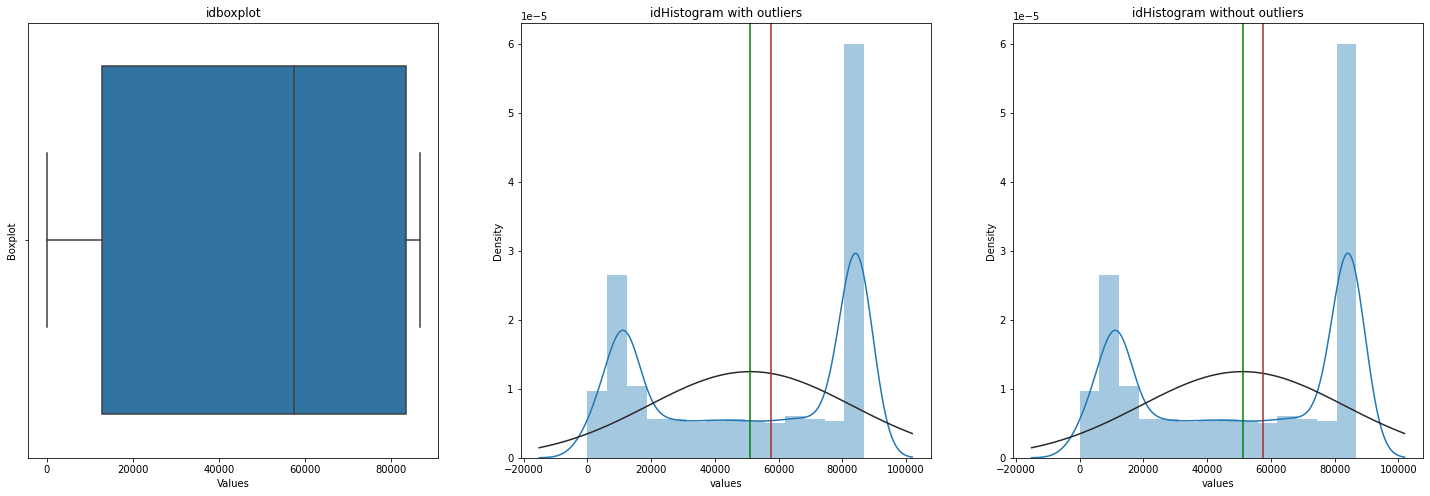

Feature unit_of_measure_(per_pack) has outliers


Total no. of outliers in unit_of_measure_(per_pack) are 1023 


Outlier percentage in unit_of_measure_(per_pack) is 10.0% 




id  unit_of_measure_(per_pack)  line_item_quantity  pack_price  \
1         3.00000                         240                1000     6.20000   
5        23.00000                         240                 416     5.35000   
18       87.00000                         200                 712    12.59000   
22      115.00000                         240                1000     1.92000   
31      262.00000                         200                  40     7.94000   
36      343.00000                         200                 200     1.70000   
47      422.00000                         270                   6    67.51000   
48      423.00000                         200                 600     1.45000   
57      533.00000                         200                 670     1.53000   
63      630.00000                         540                  34    45.52000   
65      646.00000                         240                  50    13.93000   
78      837.00000                         200                 600     1.43000   
80      839.00000                         300                  40    34.39000   
89      985.00000                         300                 524    41.10000   
94     1047.00000                         200                  32    12.59000   
98     1066.00000                         240                1008     3.56000   
99     1067.00000                         200                 960     1.20000   
100    1068.00000                         240                1800     5.84000   
102    1077.00000                         240                 346     5.65000   
104    1079.00000                         240                 342     5.65000   
111    1110.00000                         336                 400    38.36000   
112    1111.00000                         300                  30    36.00000   
120    1179.00000                         336                   8    76.72000   
128    1223.00000                         240                 460     6.17000   
149    1356.00000                         240                1000     1.92000   
150    1357.00000                         240                1000     2.10000   
151    1358.00000                         240                1000     2.10000   
157    1512.00000                         300                  30    48.26000   
159    1519.00000                         336                 100   183.33000   
195    1804.00000                         240                  30    14.53000   
205    1929.00000                         200                  12    12.54000   
219    2015.00000                         240                  40    13.94000   
225    2157.00000                         200                 120     6.11000   
226    2158.00000                         270                   6    70.68000   
227    2159.00000                         240                  40    13.51000   
240    2431.00000                         240                 929     3.65000   
252    2474.00000                         300                  40    36.00000   
278    2661.00000                         240                 416     4.35000   
280    2680.00000                         240                 906    21.05000   
285    2686.00000                         240                1000     5.05000   
286    2687.00000                         240                1000     2.44000   
295    2766.00000                         240                 500     1.90000   
297    2785.00000                         300                 200    82.20000   
304    2921.00000                         240                 500     7.26000   
347    3357.00000                         200                  60     6.01000   
379    3746.00000                         200                3000     1.99000   
382    3749.00000                         240                  30    10.42000   
385    3753.00000                         270                   2    57.45000   
409    3897.00000                         240 

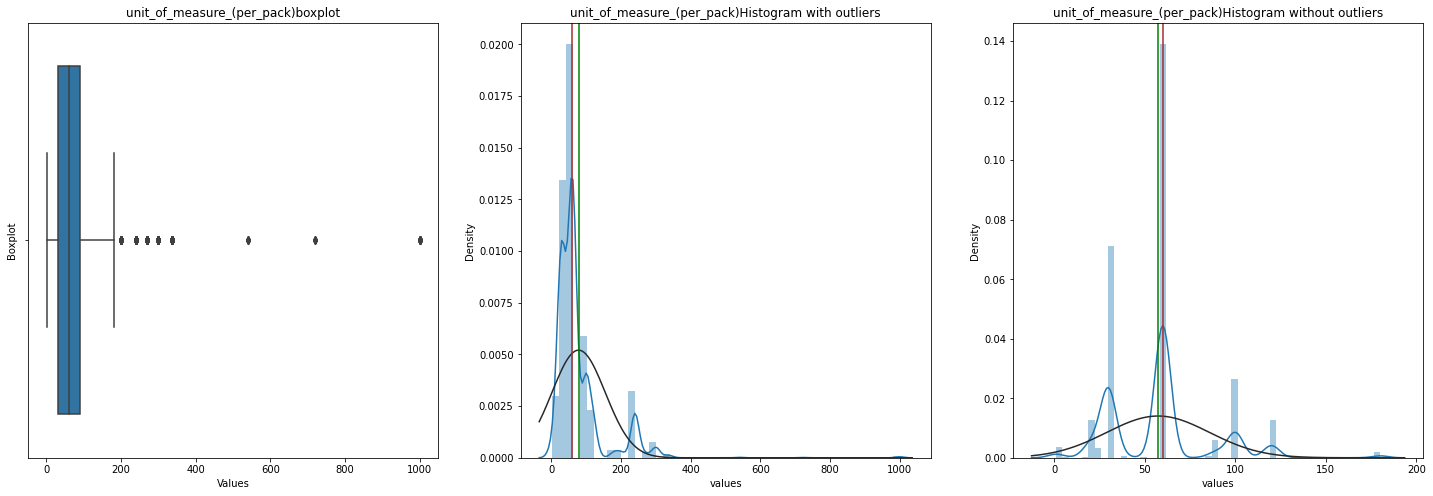

Feature line_item_quantity has outliers


Total no. of outliers in line_item_quantity are 1371 


Outlier percentage in line_item_quantity is 13.0% 




id  unit_of_measure_(per_pack)  line_item_quantity  pack_price  \
29      161.00000                          60               64000     1.55000   
64      637.00000                          60               42000     1.45000   
82      858.00000                          30               50000    50.40000   
118    1156.00000                          30               55356     6.98000   
136    1283.00000                          60               95500     1.51000   
139    1298.00000                          60               70000     7.50000   
140    1299.00000                          30               71577    15.20000   
198    1888.00000                          60               47879    11.89000   
199    1889.00000                          60               61021    11.89000   
284    2685.00000                          30               60784    16.75000   
351    3375.00000                          12               50000     0.39000   
397    3828.00000                          60               54432    11.79000   
531    5279.00000                          60               98400     3.35000   
668    6627.00000                          60               83000     3.40000   
721    7201.00000                          60               45168     9.18000   
797    8192.00000                          60              100000     7.00000   
920    9499.00000                          30               48259    11.75000   
953    9836.00000                          30               83400    11.17000   
1059  10596.00000                          60               53546     7.40000   
1078  10636.00000                          60               72333     3.40000   
1093  10654.00000                          30               52240     2.00000   
1101  10666.00000                          30               44135    12.42000   
1107  10673.00000                          60               50000     7.20000   
1119  10685.00000                          60               51293     1.52000   
1124  10690.00000                          30               42768     2.00000   
1134  10702.00000                          30               43154    26.25000   
1144  10712.00000                          60              125000     7.20000   
1150  10719.00000                          60              125010     7.20000   
1151  10720.00000                          60               45000     9.35000   
1156  10726.00000                          60               50000     3.40000   
1163  10735.00000                          60              115130     7.20000   
1166  10741.00000                          60               46163     9.45000   
1175  10751.00000                          30               50000    12.01000   
1177  10754.00000                          30              145000    12.01000   
1183  10764.00000                          60               47392     7.20000   
1198  10785.00000                          60              125000     7.12000   
1201  10788.00000                          60              108000     8.76000   
1205  10794.00000                          60               98000     3.00000   
1222  10818.00000                          60               85158    10.68000   
1235  10838.00000                          30               54263     2.00000   
1239  10843.00000                          60               52865     3.57000   
1282  10907.00000                          30               44135    12.42000   
1296  10930.00000                          30               50061    19.50000   
1302  10939.00000                          30               44135    12.42000   
1312  10950.00000                          60               50288     3.40000   
1316  10955.00000                          60               73012     7.40000   
1319  10958.00000                          60               50000     9.45000   
1321  10960.00000                          60               51364     9.50000   
1332  10972.00000                          60 

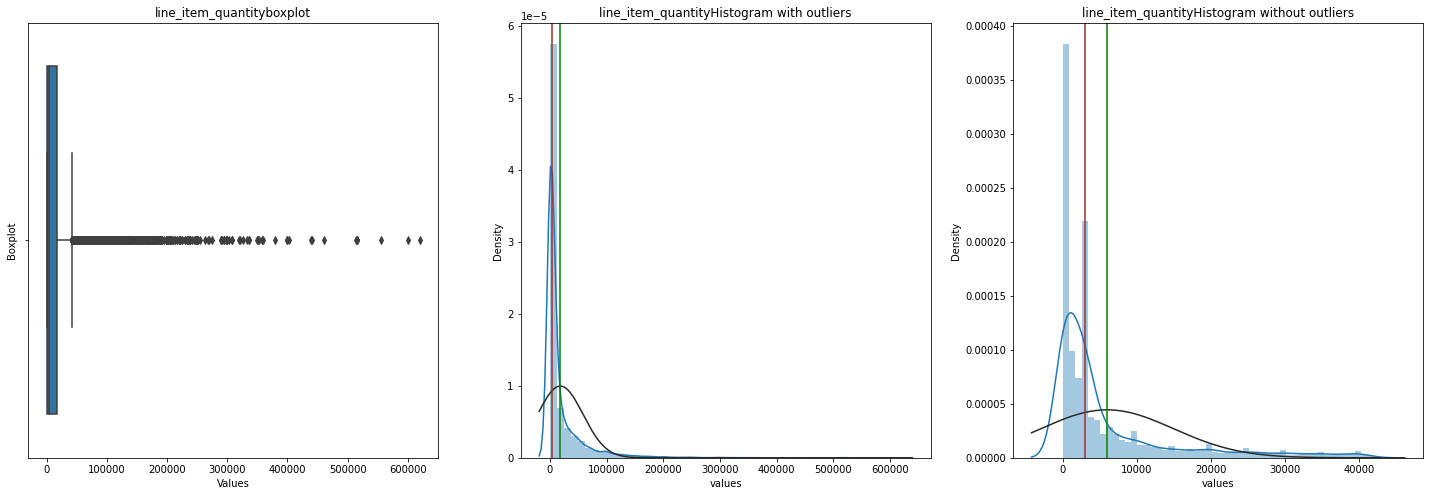

Feature pack_price has outliers


Total no. of outliers in pack_price are 1160 


Outlier percentage in pack_price is 11.0% 




id  unit_of_measure_(per_pack)  line_item_quantity  pack_price  \
2        4.00000                         100                 500    80.00000   
12      62.00000                         100                  10    85.00000   
14      65.00000                         100                 750    80.00000   
16      69.00000                         100                1500    80.00000   
19      92.00000                         100                1000    80.00000   
23     116.00000                         120                 500    82.19000   
24     130.00000                         100                 750    71.99000   
25     134.00000                         100                  25   350.00000   
37     361.00000                         100                   2   139.00000   
38     391.00000                          40                 476    76.00000   
42     400.00000                         100                  63   212.69000   
43     410.00000                         100                1634    71.99000   
45     414.00000                         100                 142    71.99000   
47     422.00000                          60                   6    67.51000   
51     464.00000                         100                5498    79.99000   
59     543.00000                         100                  28   350.00000   
60     551.00000                         100                  84   139.00000   
68     670.00000                         100                4500    71.99000   
70     717.00000                          40                 500    76.00000   
73     791.00000                         100                 150    71.99000   
109   1095.00000                         100                  20   350.00000   
115   1122.00000                         100                  60   350.00000   
116   1134.00000                         100                7500    80.00000   
117   1140.00000                         100                6395    80.00000   
119   1162.00000                          40                1000   110.00000   
120   1179.00000                          60                   8    76.72000   
122   1196.00000                         100                   5   350.00000   
123   1198.00000                          25                  67    75.00000   
129   1245.00000                          40                 147    75.35000   
130   1246.00000                         100                   6   400.00000   
132   1262.00000                         100                  15   400.00000   
142   1303.00000                         100                 200    80.00000   
144   1307.00000                          40                 375    76.00000   
145   1309.00000                         100                4650    80.00000   
147   1347.00000                         100                3500    80.00000   
154   1361.00000                         120                 500    82.19000   
159   1519.00000                          60                 100   183.33000   
163   1531.00000                         100                  50   350.00000   
164   1549.00000                         100                 650    79.99000   
172   1638.00000                         100                3000    71.99000   
174   1644.00000                         100                1116    70.00000   
175   1645.00000                         100                1116    70.00000   
177   1647.00000                         100                 213    71.99000   
178   1648.00000                         100                  10   350.00000   
196   1820.00000                         100                1123    70.00000   
197   1861.00000                         100                 340   139.00000   
207   1940.00000                         100                 213    71.99000   
209   1942.00000                         100                6875    79.99000   
210   1954.00000                         120                 434    82.20000   
226   2158.000

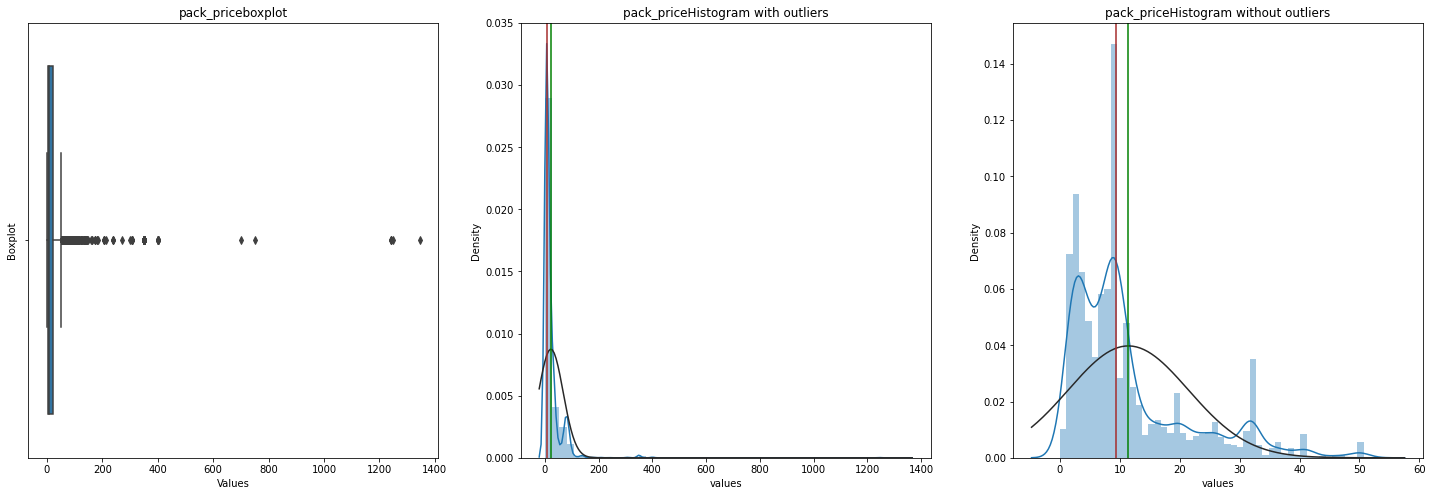

Feature unit_price has outliers


Total no. of outliers in unit_price are 880 


Outlier percentage in unit_price is 9.0% 




id  unit_of_measure_(per_pack)  line_item_quantity  pack_price  \
11       61.00000                          20                2500    40.00000   
20       96.00000                          20                7500    27.00000   
25      134.00000                         100                  25     9.30000   
30      176.00000                          20               10000    27.00000   
37      361.00000                         100                   2     9.30000   
38      391.00000                          40                 476     9.30000   
42      400.00000                         100                  63     9.30000   
44      411.00000                          20                1425    27.00000   
53      466.00000                          20                  15    46.09000   
59      543.00000                         100                  28     9.30000   
60      551.00000                         100                  84     9.30000   
67      668.00000                          25                  98    37.50000   
69      712.00000                          20                  10    32.00000   
70      717.00000                          40                 500     9.30000   
72      772.00000                          30                   9    50.40000   
74      796.00000                           2                  15    30.00000   
81      849.00000                          25                 108    37.50000   
82      858.00000                          30                3000    50.40000   
84      937.00000                          20                5700    32.00000   
109    1095.00000                         100                  20     9.30000   
113    1114.00000                          30                  80    35.20000   
115    1122.00000                         100                  60     9.30000   
119    1162.00000                          40                1000     9.30000   
122    1196.00000                         100                   5     9.30000   
123    1198.00000                          25                  67     9.30000   
125    1215.00000                          20                 220    32.00000   
129    1245.00000                          40                 147     9.30000   
130    1246.00000                         100                   6     9.30000   
132    1262.00000                         100                  15     9.30000   
137    1285.00000                          20                 900    40.00000   
144    1307.00000                          40                 375     9.30000   
160    1527.00000                          20               10000    27.00000   
163    1531.00000                         100                  50     9.30000   
166    1593.00000                          20                 450    32.00000   
167    1594.00000                          20               10270    27.00000   
168    1618.00000                          20                9000    32.00000   
169    1628.00000                          20                6040    32.00000   
171    1637.00000                          20                 289    27.00000   
176    1646.00000                          20                 832    32.00000   
178    1648.00000                         100                  10     9.30000   
197    1861.00000                         100                 340     9.30000   
214    1971.00000                          25                 108    37.50000   
215    1972.00000                          20                5958    27.00000   
216    1973.00000                          20                3982    27.00000   
217    2008.00000                           1                6998    23.00000   
220    2146.00000                           1                3470    23.00000   
221    2147.00000                           1                3510    23.00000   
222    2148.00000                           1                5000     2.54000   
229    2173.00000                          25 

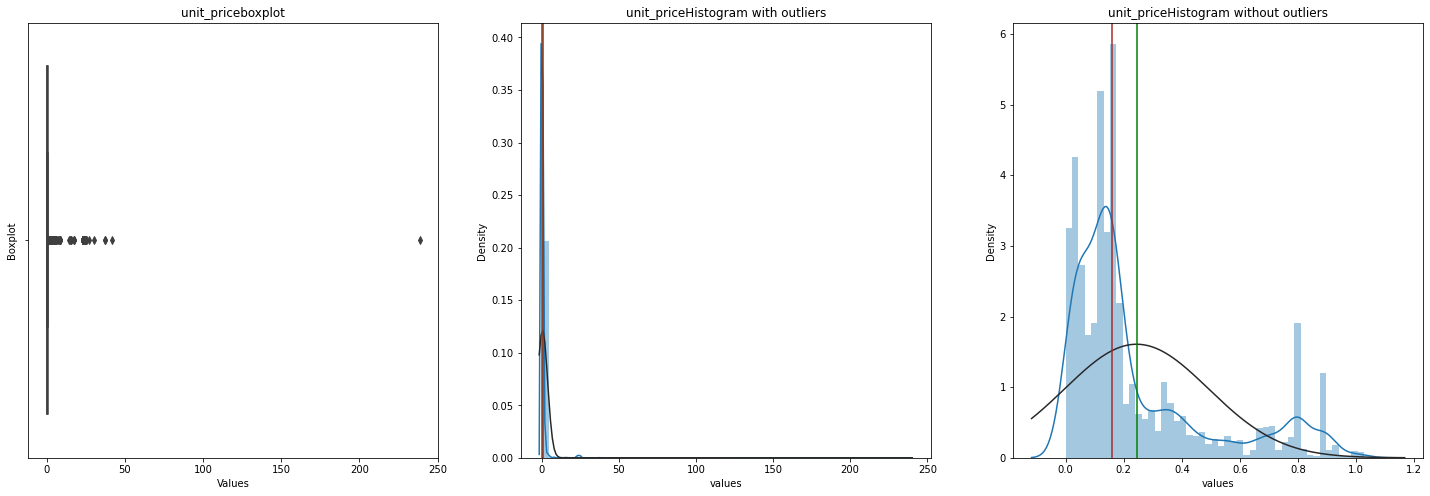

Feature weight_(kilograms) has outliers


Total no. of outliers in weight_(kilograms) are 1145 


Outlier percentage in weight_(kilograms) is 11.0% 




id  unit_of_measure_(per_pack)  line_item_quantity  pack_price  \
136    1283.00000                          60                3000     1.51000   
168    1618.00000                          20                9000    32.00000   
284    2685.00000                          30                3000    16.75000   
417    3972.00000                         100                2500     9.30000   
530    5278.00000                          60               33333     3.61000   
536    5293.00000                         100                 230     9.30000   
661    6608.00000                         100                 600     9.30000   
668    6627.00000                          60                3000     3.40000   
779    7953.00000                         100                 850     9.30000   
797    8192.00000                          60                3000     7.00000   
856    9000.00000                          30                 560     9.00000   
906    9280.00000                          60               38534    11.00000   
1056  10589.00000                          60                 338    21.05000   
1064  10613.00000                          60               13850     2.15000   
1108  10674.00000                          60                1300     3.40000   
1144  10712.00000                          60                3000     7.20000   
1163  10735.00000                          60                3000     7.20000   
1177  10754.00000                          30                3000    12.01000   
1190  10774.00000                          60                 500     7.71000   
1198  10785.00000                          60                3000     7.12000   
1201  10788.00000                          60                3000     8.76000   
1205  10794.00000                          60                3000     3.00000   
1239  10843.00000                          60                3000     3.57000   
1250  10861.00000                          60                 143    38.36000   
1251  10862.00000                          60               17191    17.50000   
1258  10878.00000                          60               13850     2.15000   
1259  10879.00000                          60               15913     1.97000   
1260  10880.00000                          60               14700     1.52000   
1312  10950.00000                          60                3000     3.40000   
1316  10955.00000                          60                3000     7.40000   
1317  10956.00000                          30               27156    26.25000   
1332  10972.00000                          60                3000     9.50000   
1339  10981.00000                          60               38975     7.20000   
1340  10982.00000                          60               11640     7.75000   
1344  10986.00000                          60                3000     7.40000   
1353  10996.00000                          60                3000     7.40000   
1355  10998.00000                          60                3000     7.20000   
1356  10999.00000                          60                3000     7.40000   
1363  11008.00000                          60                3000     7.40000   
1367  11012.00000                          60                1000     1.50000   
1369  11014.00000                          90                1000    15.26000   
1373  11018.00000                          30                8192    11.00000   
1464  11154.00000                          90                 271    16.95000   
1467  11161.00000                          60                3000     3.40000   
1468  11162.00000                          30                3000    19.50000   
1470  11174.00000                          60                3000     3.04000   
1500  11224.00000                          60               29593     9.50000   
1510  11235.00000                          60                5809     9.45000   
1512  11238.00000                          60 

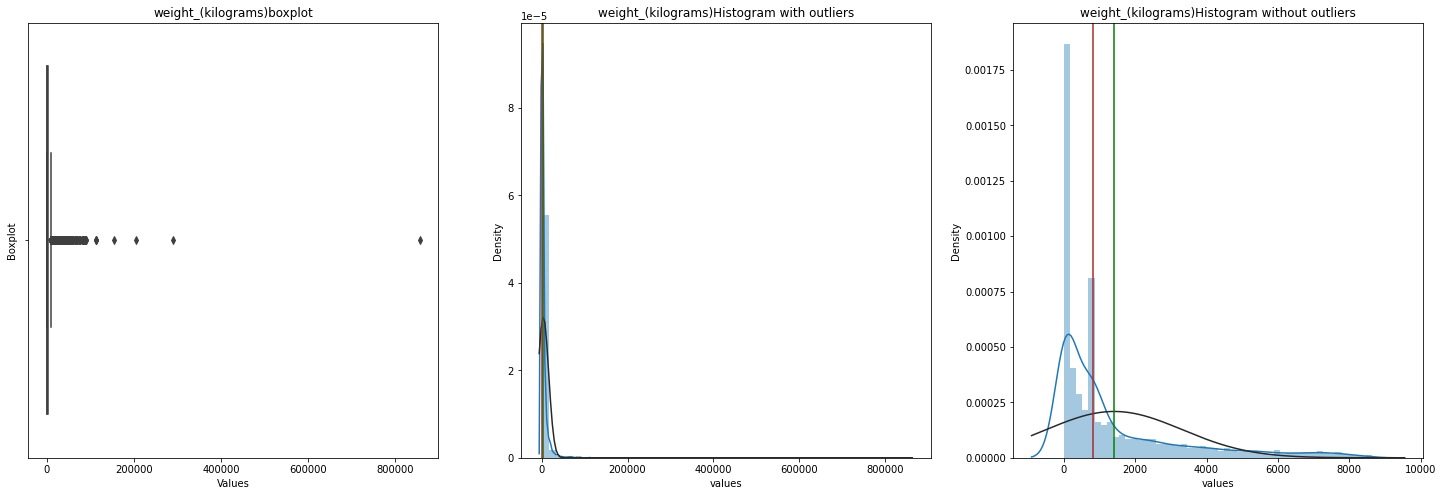

Feature consignment_price has outliers


Total no. of outliers in consignment_price are 1094 


Outlier percentage in consignment_price is 11.0% 




id  unit_of_measure_(per_pack)  line_item_quantity  pack_price  \
51      464.00000                         100                5498     9.30000   
82      858.00000                          30                3000    50.40000   
116    1134.00000                         100                7500     9.30000   
117    1140.00000                         100                6395     9.30000   
139    1298.00000                          60                3000     7.50000   
140    1299.00000                          30                3000    15.20000   
198    1888.00000                          60                3000    11.89000   
199    1889.00000                          60                3000    11.89000   
209    1942.00000                         100                6875     9.30000   
228    2171.00000                         100                5751     9.30000   
234    2305.00000                          30               25000    50.40000   
237    2417.00000                         100                9000     9.30000   
281    2681.00000                          60               38780    11.14000   
284    2685.00000                          30                3000    16.75000   
363    3507.00000                         100                5259     9.30000   
396    3808.00000                         100                7500     9.30000   
397    3828.00000                          60                3000    11.79000   
481    4824.00000                          30               24963    50.40000   
486    4949.00000                         120               10680    41.10000   
534    5282.00000                          30               38300    16.75000   
728    7321.00000                         100                7690     9.30000   
743    7638.00000                         120               12560    41.10000   
772    7868.00000                          60                5178     9.30000   
797    8192.00000                          60                3000     7.00000   
848    8864.00000                         120               12500    41.10000   
887    9095.00000                         100                7500     9.30000   
906    9280.00000                          60               38534    11.00000   
920    9499.00000                          30                3000    11.75000   
953    9836.00000                          30                3000    11.17000   
957    9866.00000                         100                6502     9.30000   
1006  10401.00000                         100                7500     9.30000   
1007  10406.00000                         100                6393     9.30000   
1101  10666.00000                          30                3000    12.42000   
1134  10702.00000                          30                3000    26.25000   
1144  10712.00000                          60                3000     7.20000   
1150  10719.00000                          60                3000     7.20000   
1151  10720.00000                          60                3000     9.35000   
1163  10735.00000                          60                3000     7.20000   
1166  10741.00000                          60                3000     9.45000   
1171  10747.00000                          30               17067    26.25000   
1175  10751.00000                          30                3000    12.01000   
1177  10754.00000                          30                3000    12.01000   
1198  10785.00000                          60                3000     7.12000   
1201  10788.00000                          60                3000     8.76000   
1222  10818.00000                          60                3000    10.68000   
1282  10907.00000                          30                3000    12.42000   
1296  10930.00000                          30                3000    19.50000   
1302  10939.00000                          30                3000    12.42000   
1316  10955.00000                          60 

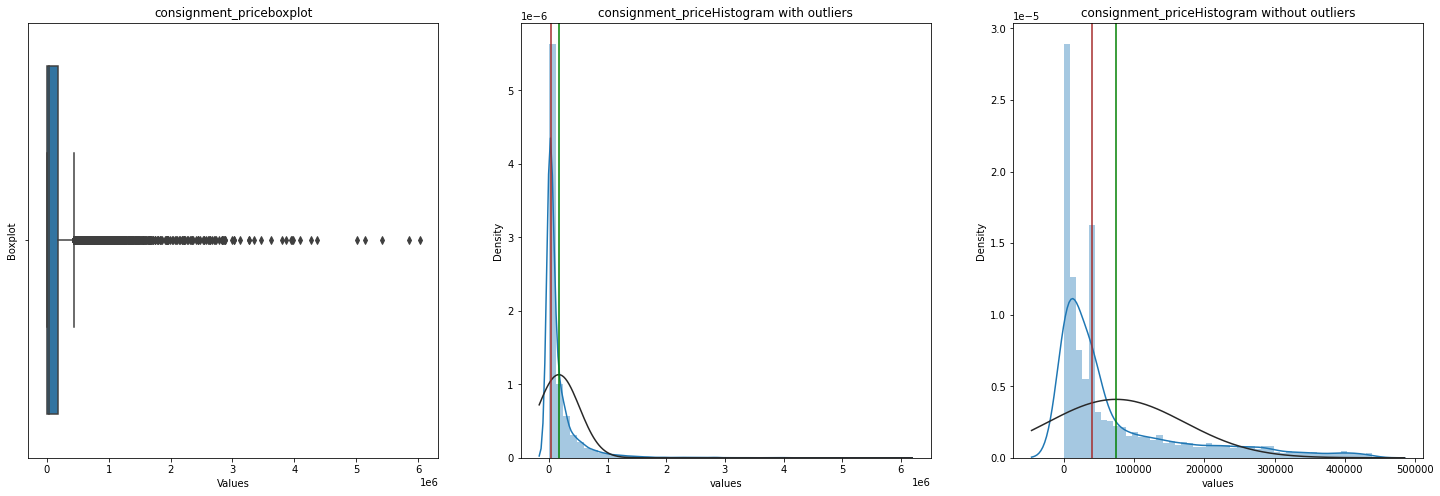

In [84]:
for col in data1:
    odt_plots(data1,col)

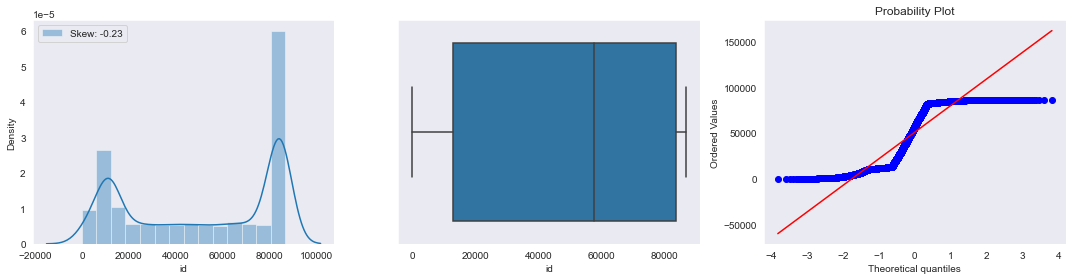

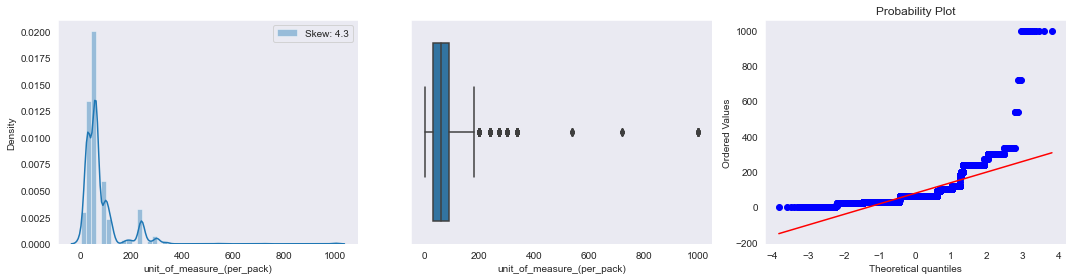

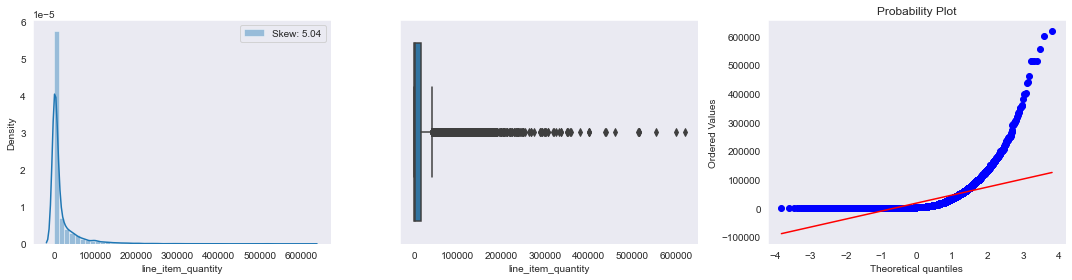

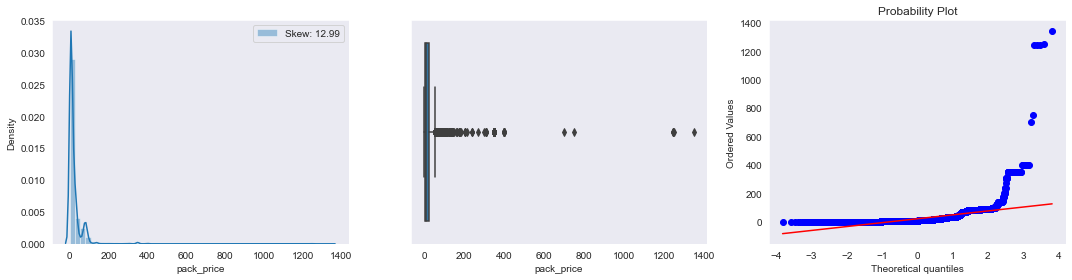

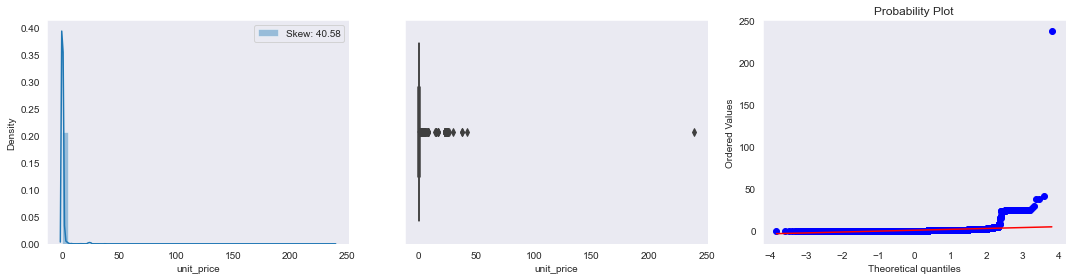

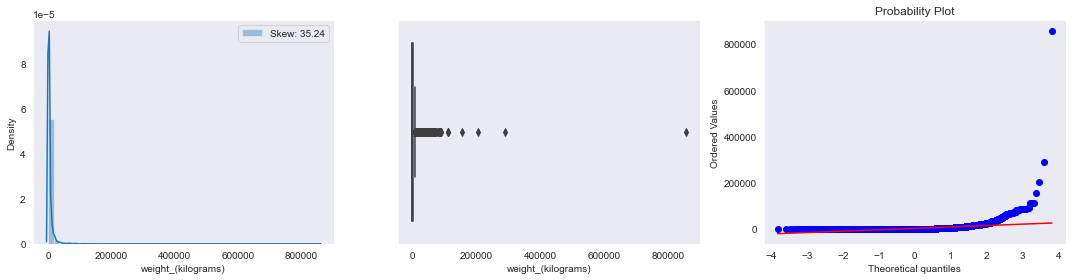

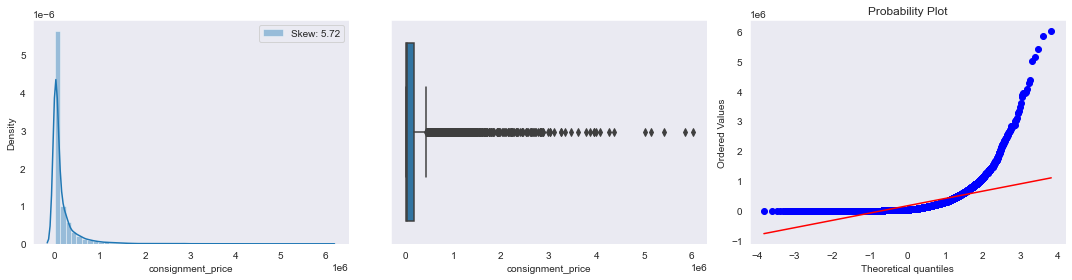

In [85]:
#KDE, Box & Probability plot 

sns.set_style('dark')
for col in data1.select_dtypes(np.number).columns:
    plt.figure(figsize= (15,4))
    plt.subplot(131)
    sns.distplot(df[col],label="Skew: "+ str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col],plot = plt)
    plt.tight_layout()
    plt.show()

## Visulizations

### Shipment Mode

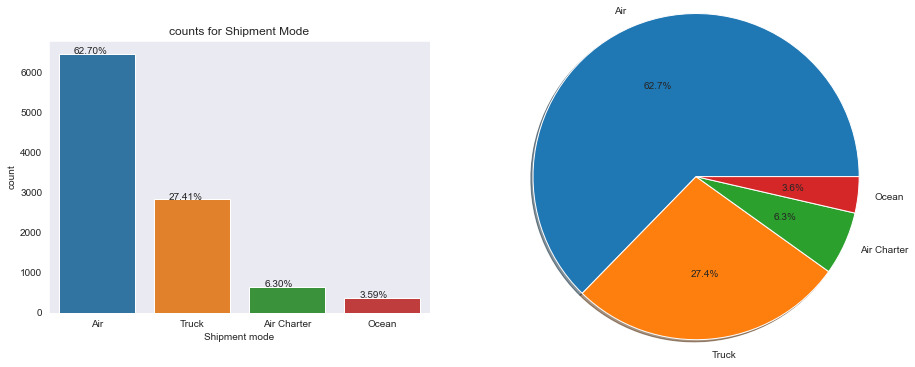

In [86]:
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(121)


ax=sns.countplot(x='shipment_mode',data=df)
total = df.shape[0]
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()/5
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))
plt.title("counts for Shipment Mode")
plt.xlabel('Shipment mode')

ax=fig.add_subplot(122)
lbs=['Air','Truck','Air Charter','Ocean']
plt.pie(df['shipment_mode'].value_counts(),labels=lbs,autopct='%1.1f%%',shadow=True,radius=1.5)
plt.show()

### Observation:
 - The bar chart shows the count of each shipment category the Air has 62.70%
 - The pie chart shows the composition of the shipment mode in the form of slices

In [87]:
df.columns

Index(['id', 'project_code', 'pq_#', 'po_/_so_#', 'asn/dn_#', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'consignment_price'],
      dtype='object')

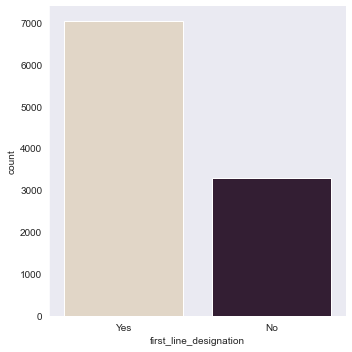

In [88]:
ax=sns.catplot(data=df, x="first_line_designation", kind="count", palette="ch:.25")

### Observation:
 - The count plot shows the first line designation of yes and no

In [89]:
def barplot(data,cols):
    plt.figure(figsize=(25,10))
    data.value_counts().plot.bar()
    plt.title("barplot for {}".format(cols))
    plt.show()

In [90]:
df.columns

Index(['id', 'project_code', 'pq_#', 'po_/_so_#', 'asn/dn_#', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'consignment_price'],
      dtype='object')

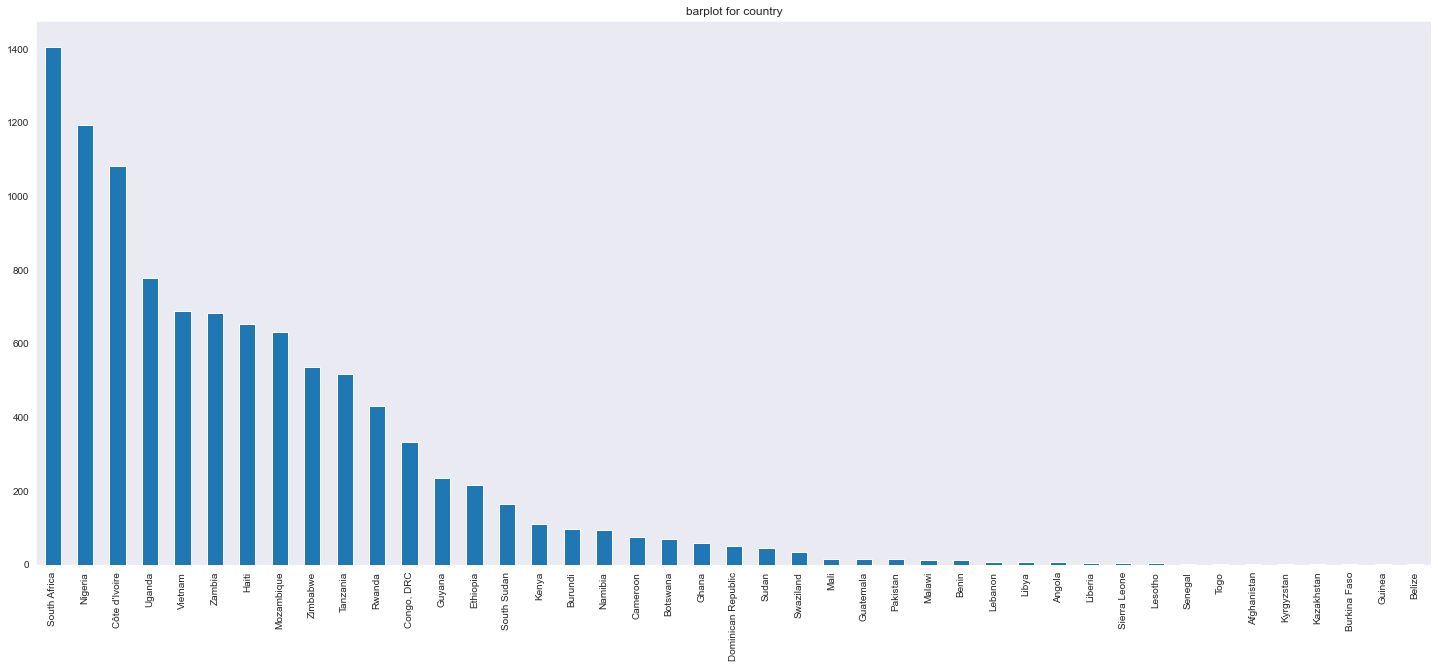

In [91]:
barplot(df['country'],"country")

Top 20 Countries Wise Count 

South Africa     1406
Nigeria          1194
Côte d'Ivoire    1083
Uganda            779
Vietnam           688
Zambia            683
Haiti             655
Mozambique        631
Zimbabwe          538
Tanzania          519
Rwanda            430
Congo, DRC        333
Guyana            237
Ethiopia          216
South Sudan       164
Kenya             111
Burundi            98
Namibia            95
Cameroon           75
Botswana           70
Name: country, dtype: int64


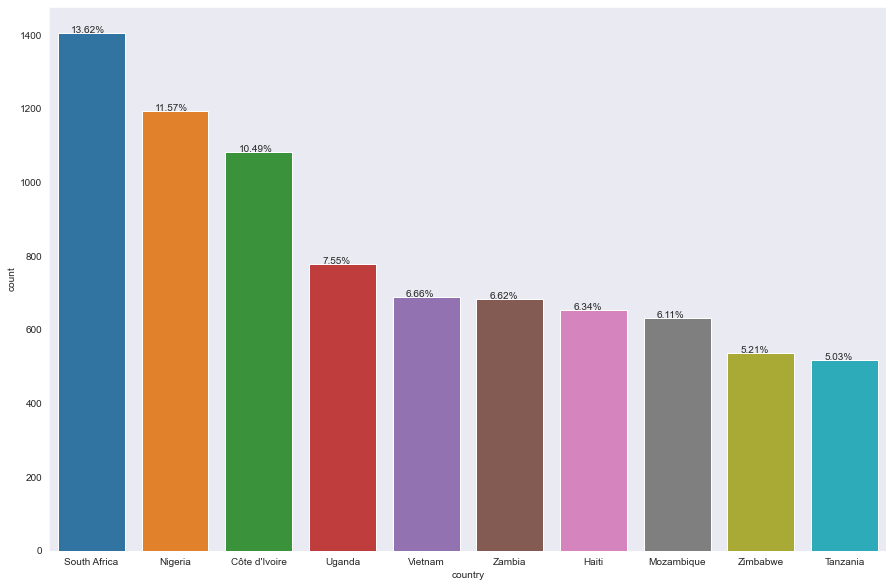

In [92]:
plt.figure(figsize=(15,10))
itemcount=df['country'].value_counts().nlargest(20)
print("Top 20 Countries Wise Count \n")
print(itemcount)
ax=sns.countplot(df['country'],order=df['country'].value_counts().nlargest(10).index)

total = df.shape[0]
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()/5
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))
  
plt.show()

### Observation:
 - The count plot shows the To 20 countries who has most logistics and mostly from South Africa

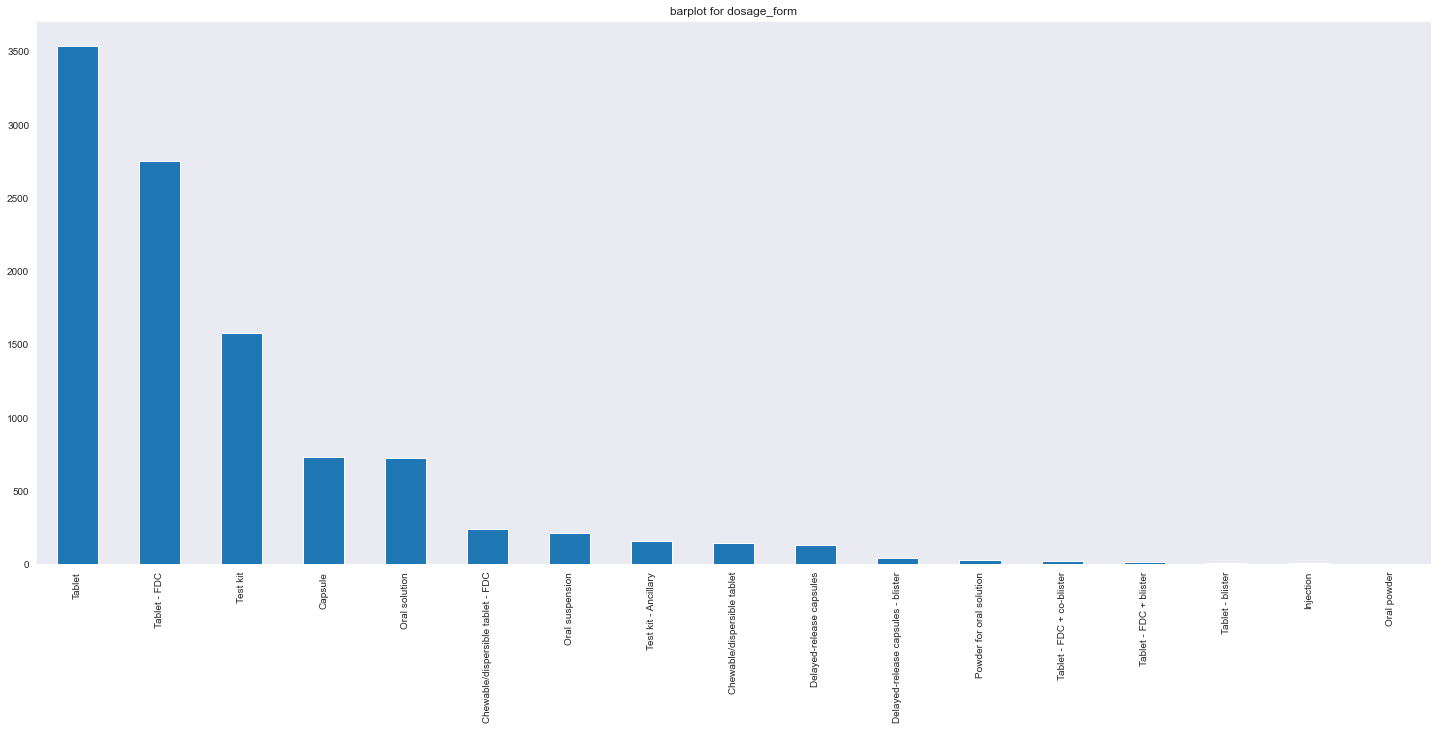

In [93]:
barplot(df["dosage_form"],"dosage_form")

### Observation:
 - The Dosage form is having miscellaneous have to deal with the data

Top 20 Dosage Form Count 

Tablet                               3532
Tablet - FDC                         2749
Test kit                             1575
Capsule                               729
Oral solution                         727
Chewable/dispersible tablet - FDC     239
Oral suspension                       214
Test kit - Ancillary                  161
Chewable/dispersible tablet           146
Delayed-release capsules              131
Name: dosage_form, dtype: int64


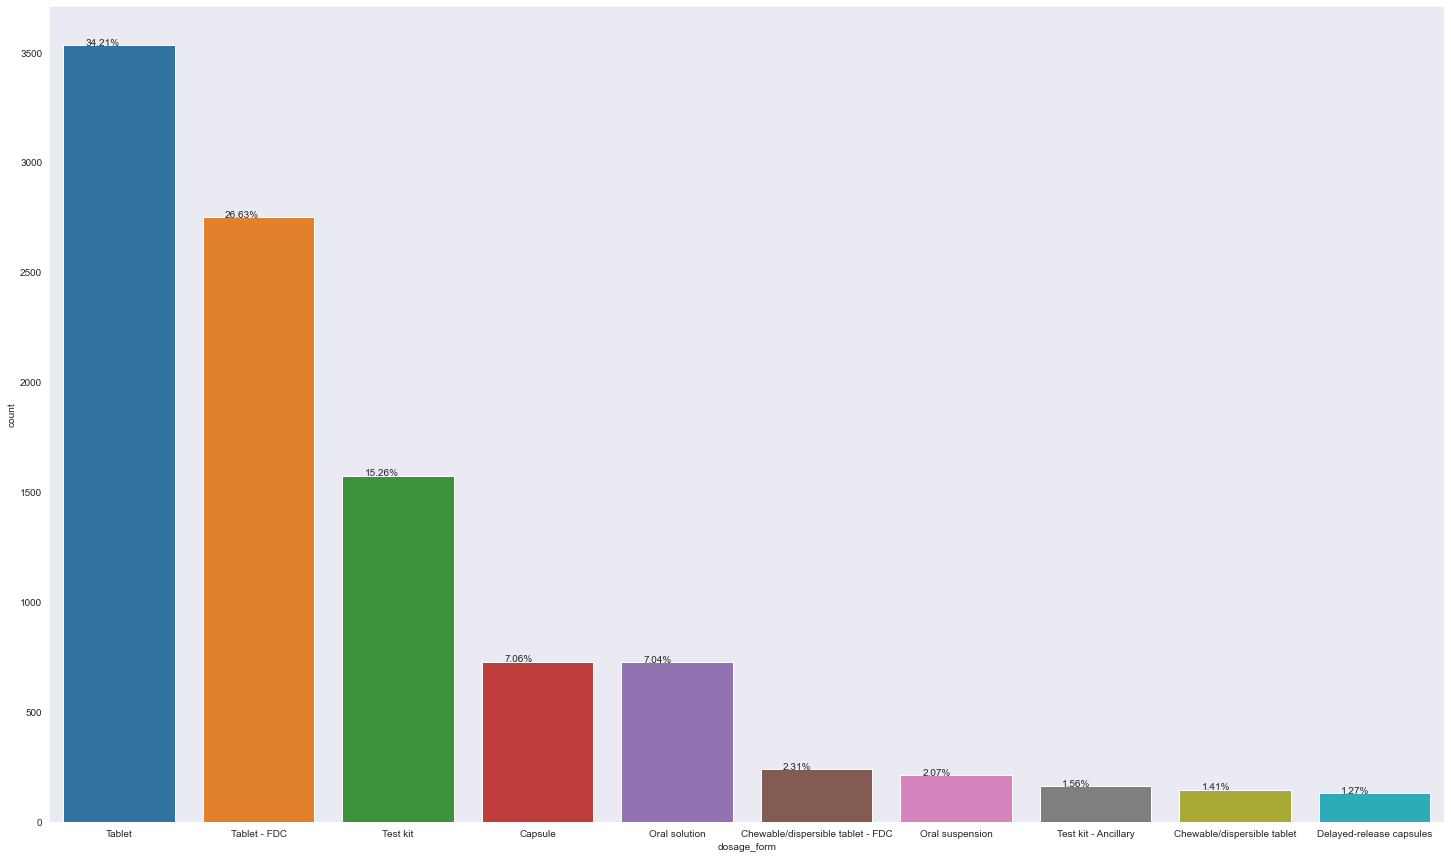

In [94]:
plt.figure(figsize=(25,15))
itemcount=df["dosage_form"].value_counts().nlargest(10)
print("Top 20 Dosage Form Count \n")
print(itemcount)
ax=sns.countplot(df["dosage_form"],order=df["dosage_form"].value_counts().nlargest(10).index)

total = df.shape[0]
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()/5
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))
  
plt.show()

In [95]:
df.columns

Index(['id', 'project_code', 'pq_#', 'po_/_so_#', 'asn/dn_#', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'consignment_price'],
      dtype='object')

In [96]:
df["product_group"].value_counts()

ARV     8550
HRDT    1728
ANTM      22
ACT       16
MRDT       8
Name: product_group, dtype: int64

Product Group Count 

ARV     8550
HRDT    1728
ANTM      22
ACT       16
MRDT       8
Name: product_group, dtype: int64


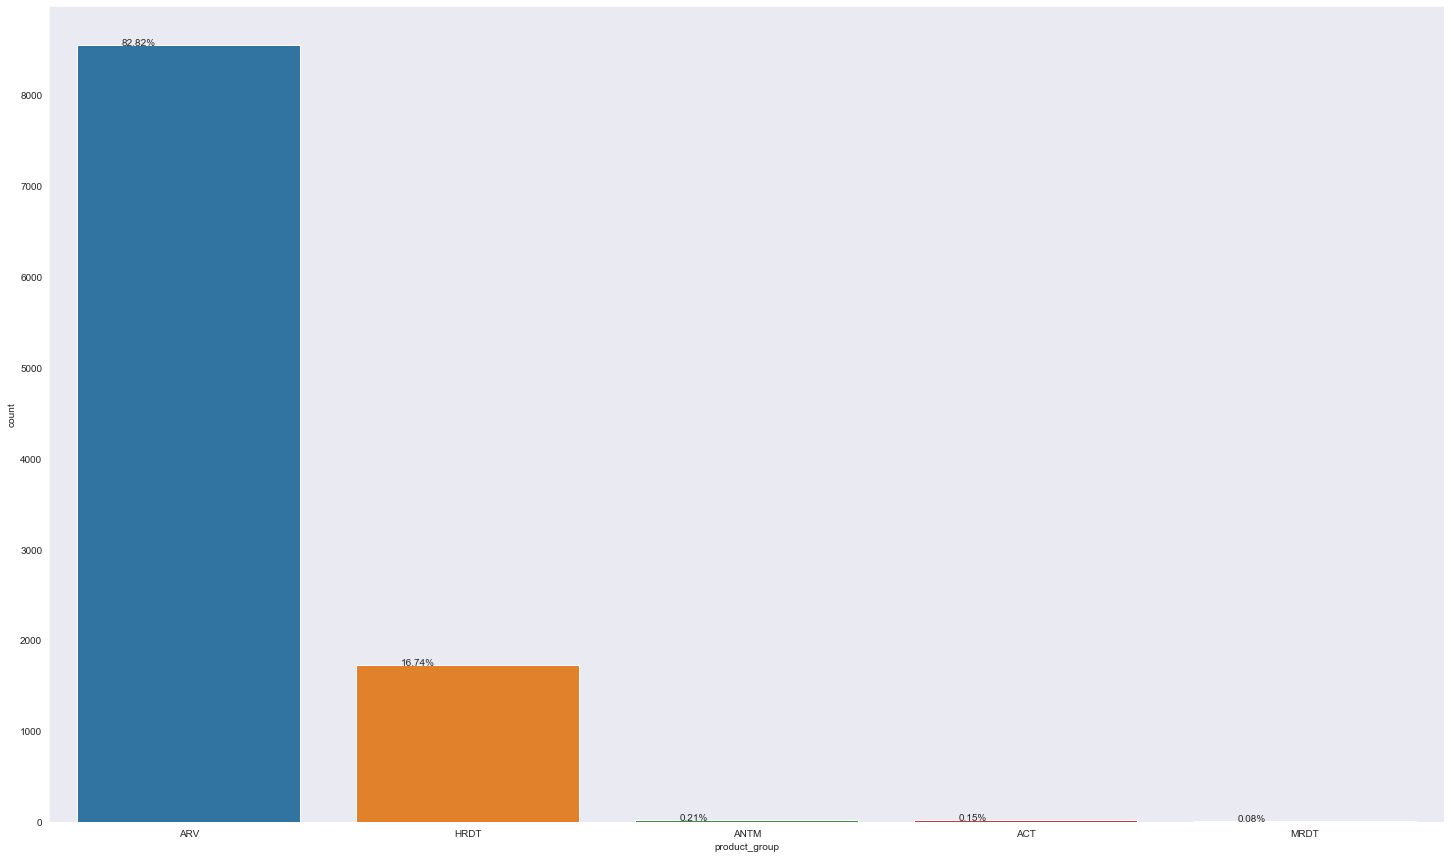

In [97]:
plt.figure(figsize=(25,15))
itemcount=df["product_group"].value_counts()
print("Product Group Count \n")
print(itemcount)
ax=sns.countplot(df["product_group"],order=df["product_group"].value_counts().index)

total = df.shape[0]
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()/5
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))
  
plt.show()

In [98]:
def plot(data,col_name):
    fig=plt.figure(figsize=(25,10))
    ax0=fig.add_subplot(121)
    data.value_counts().plot.bar()
    plt.title("bar plot for {} column".format(col_name))
    
    ax1=fig.add_subplot(122)
    lbs=data
    data.value_counts().plot.pie(labels=lbs,autopct='1.1f%%',shadow=True,radius=1.5)
    plt.title("pie chart for {} column".format(col_name))

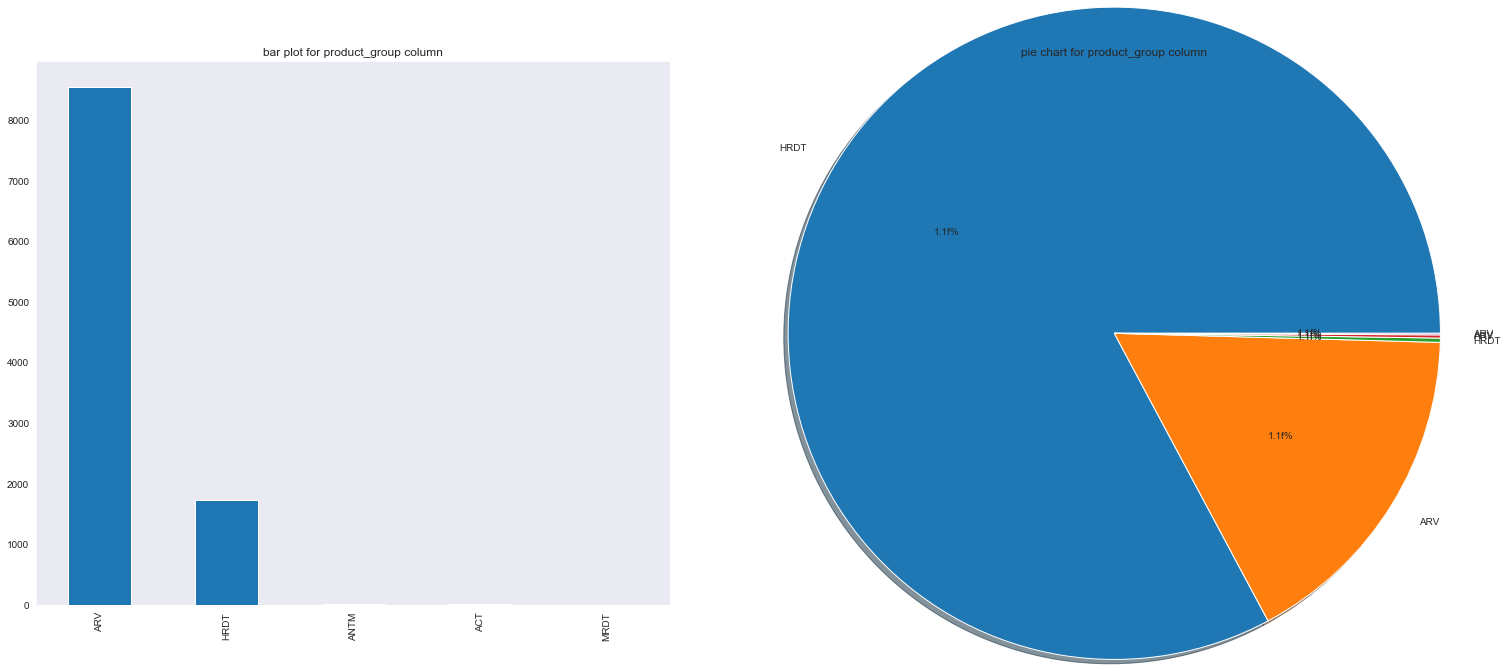

In [99]:
plot(df["product_group"],"product_group")

In [100]:
df.columns

Index(['id', 'project_code', 'pq_#', 'po_/_so_#', 'asn/dn_#', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'consignment_price'],
      dtype='object')

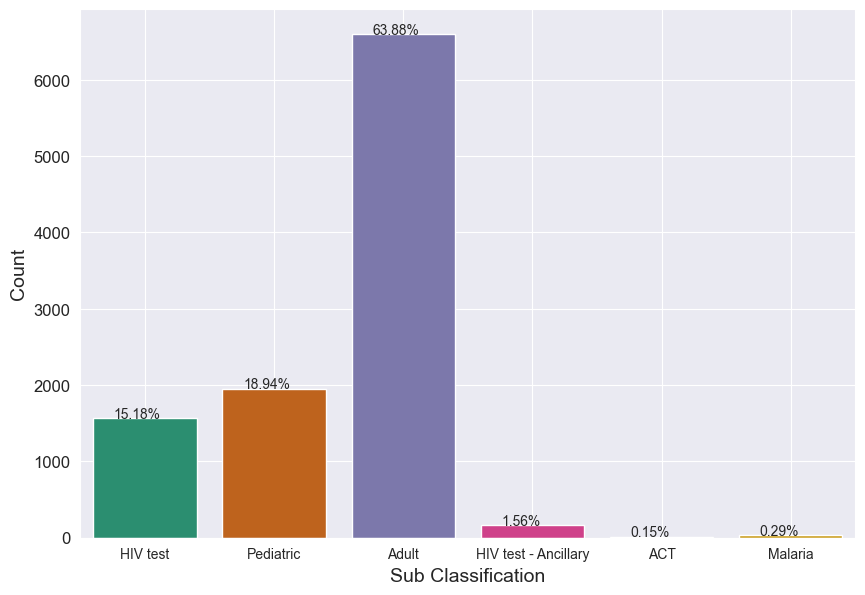

In [101]:
# Instantiate a figure of size of 15 x 7 inches
fig = plt.figure(figsize=(10, 7),dpi =100)


ax = sns.countplot(x='sub_classification',  data=df, palette='Dark2')

# Adding percentages to the bars
total = df.shape[0]
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()/5
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))
    
# Adding some cosmetics - ticks, labels, title, legend and grid.
plt.xticks(rotation=0, size=10)
plt.yticks(fontsize=12)
plt.xlabel(xlabel="Sub Classification", size=14,)
plt.ylabel(ylabel='Count', size=14)
plt.grid(b=True)

# Display the figure
plt.show()

In [102]:
df.columns

Index(['id', 'project_code', 'pq_#', 'po_/_so_#', 'asn/dn_#', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'consignment_price'],
      dtype='object')

In [103]:
"""for i in object_columns:
    print(i)
    print(df[i].value_counts(),df[i].value_counts(normalize=True)*100,end="")
    print('-----------------------------------------------------')"""

'for i in object_columns:\n    print(i)\n    print(df[i].value_counts(),df[i].value_counts(normalize=True)*100,end="")\n    print(\'-----------------------------------------------------\')'

In [104]:
df.columns

Index(['id', 'project_code', 'pq_#', 'po_/_so_#', 'asn/dn_#', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'consignment_price'],
      dtype='object')

In [105]:
"""
for i in object_columns:
    a = df.groupby(i).size().reset_index(name='counts').sort_values('counts',ascending=False)
    a['percentage %'] = (a['counts']/len(df))*100
    print(a)
    print()
    print("*"*90)
"""

'\nfor i in object_columns:\n    a = df.groupby(i).size().reset_index(name=\'counts\').sort_values(\'counts\',ascending=False)\n    a[\'percentage %\'] = (a[\'counts\']/len(df))*100\n    print(a)\n    print()\n    print("*"*90)\n'

In [106]:
df1 = df.copy()

### trying to set threshold value to each and every column in order to replace that below thresold value,values to others

In [107]:
df1['project_code'].value_counts()

116-ZA-T30    768
104-CI-T30    729
151-NG-T30    628
114-UG-T30    596
108-VN-T30    522
106-HT-T30    450
111-MZ-T30    431
110-ZM-T30    406
109-TZ-T30    369
107-RW-T30    340
116-ZA-T01    319
161-ZA-T30    315
104-CI-T01    314
101-CD-T30    308
113-ZW-T30    263
110-ZM-T01    260
111-MZ-T01    200
106-HT-T01    171
108-VN-T01    166
105-GY-T30    159
133-NG-T30    145
112-NG-T01    139
109-TZ-T01    135
114-UG-T01    134
117-ET-T01    118
103-ZW-T30    101
102-BI-T30     98
117-ET-T30     98
105-SS-T30     91
107-RW-T01     90
151-NG-T01     65
113-ZW-T01     65
123-NG-T01     52
102-KE-T30     47
102-SD-T30     46
119-NA-T01     45
100-ZW-T01     44
102-NG-T01     42
102-GY-T01     41
100-CI-T01     40
103-SS-T30     37
901-CM-T30     36
102-KE-T01     32
105-GH-T30     32
900-SS-T30     30
102-BW-T01     30
200-ZW-T30     28
154-NG-T30     27
102-ZW-T30     26
102-CD-T30     24
900-UG-T30     23
102-UG-T30     21
103-CM-T30     20
102-GY-T30     19
144-BW-T30     18
901-NA-T30

In [108]:
th1 = 254
counts = df1['project_code'].value_counts()
repl = counts[counts<=th1].index
df1['project_code']=(df1['project_code'].replace(repl,'others'))

In [109]:
df1['project_code'].value_counts()

others        3306
116-ZA-T30     768
104-CI-T30     729
151-NG-T30     628
114-UG-T30     596
108-VN-T30     522
106-HT-T30     450
111-MZ-T30     431
110-ZM-T30     406
109-TZ-T30     369
107-RW-T30     340
116-ZA-T01     319
161-ZA-T30     315
104-CI-T01     314
101-CD-T30     308
113-ZW-T30     263
110-ZM-T01     260
Name: project_code, dtype: int64

In [110]:
th1 = 2212
counts = df1['pq_#'].value_counts()
repl = counts[counts<th1].index
df1['pq_#']=(df1['pq_#'].replace(repl,'others'))

In [111]:
df1['pq_#'].value_counts()

others            7643
Pre-PQ Process    2681
Name: pq_#, dtype: int64

In [112]:
df1['po_/_so_#'].value_counts()

SO      5404
SCMS    4919
DSCM       1
Name: po_/_so_#, dtype: int64

In [113]:
df1["country"].value_counts()

South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Mali                    17
Guatemala               15
Pakistan                15
Malawi                  14
Benin                   13
Lebanon                  8
Libya                    8
Angola                   7
Liberia                  6
Sierra Leone             4
Lesotho                  4
Senegal                  3
Togo                     3
A

In [114]:
th1 = 130
counts = df1['country'].value_counts()
repl = counts[counts<=th1].index
df1['country']=(df1['country'].replace(repl,'others'))

In [115]:
df1["country"].value_counts()

South Africa     1406
Nigeria          1194
Côte d'Ivoire    1083
Uganda            779
others            768
Vietnam           688
Zambia            683
Haiti             655
Mozambique        631
Zimbabwe          538
Tanzania          519
Rwanda            430
Congo, DRC        333
Guyana            237
Ethiopia          216
South Sudan       164
Name: country, dtype: int64

In [116]:
df1['country'] = df1['country'].str.replace(r'[^a-zA-Z0-9\s]',"")

In [117]:
df1["country"] = df1["country"].replace({"Cte dIvoire":"Ivory Coast"})

In [118]:
df1["country"].value_counts()

South Africa    1406
Nigeria         1194
Ivory Coast     1083
Uganda           779
others           768
Vietnam          688
Zambia           683
Haiti            655
Mozambique       631
Zimbabwe         538
Tanzania         519
Rwanda           430
Congo DRC        333
Guyana           237
Ethiopia         216
South Sudan      164
Name: country, dtype: int64

In [119]:
df1['asn/dn_#'].value_counts()

DN     5404
ASN    4920
Name: asn/dn_#, dtype: int64

In [120]:
df1['vendor_inco_term'].value_counts()

N/A - From RDC    5404
EXW               2778
DDP               1443
FCA                397
CIP                275
DDU                 15
DAP                  9
CIF                  3
Name: vendor_inco_term, dtype: int64

In [121]:
th1 = 197
counts = df1['vendor_inco_term'].value_counts()
repl = counts[counts<th1].index
df1['vendor_inco_term']=(df1['vendor_inco_term'].replace(repl,'others'))

In [122]:
df1['vendor_inco_term'].value_counts()

N/A - From RDC    5404
EXW               2778
DDP               1443
FCA                397
CIP                275
others              27
Name: vendor_inco_term, dtype: int64

In [123]:
df1['product_group'].value_counts()

ARV     8550
HRDT    1728
ANTM      22
ACT       16
MRDT       8
Name: product_group, dtype: int64

In [124]:
th1 = 1537
counts = df1['product_group'].value_counts()
repl = counts[counts<th1].index
df1['product_group']=(df1['product_group'].replace(repl,'others'))

In [125]:
df1['product_group'].value_counts()

ARV       8550
HRDT      1728
others      46
Name: product_group, dtype: int64

In [126]:
df1['sub_classification'].value_counts()

Adult                   6595
Pediatric               1955
HIV test                1567
HIV test - Ancillary     161
Malaria                   30
ACT                       16
Name: sub_classification, dtype: int64

In [127]:
th1 = 1433
counts = df1['sub_classification'].value_counts()
repl = counts[counts<th1].index
df1['sub_classification']=(df1['sub_classification'].replace(repl,'others'))

In [128]:
df1['sub_classification'].value_counts()

Adult        6595
Pediatric    1955
HIV test     1567
others        207
Name: sub_classification, dtype: int64

In [129]:
df1['vendor'].value_counts()

SCMS from RDC                                                        5404
Orgenics, Ltd                                                         754
S. BUYS WHOLESALER                                                    715
Aurobindo Pharma Limited                                              668
Trinity Biotech, Plc                                                  356
ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)                       347
PHARMACY DIRECT                                                       326
MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES)                 317
HETERO LABS LIMITED                                                   277
CIPLA LIMITED                                                         175
CHEMBIO DIAGNOSTIC SYSTEMS, INC.                                      109
Standard Diagnostics, Inc.                                             98
STRIDES ARCOLAB LIMITED                                                93
SHANGHAI KEHUA BIOENGINEERING CO.,LTD.

In [130]:
th1 = 157
counts = df1['vendor'].value_counts()
repl = counts[counts<th1].index
df1['vendor']=(df1['vendor'].replace(repl,'others'))

In [131]:
df1['vendor'].value_counts()

SCMS from RDC                                            5404
others                                                    985
Orgenics, Ltd                                             754
S. BUYS WHOLESALER                                        715
Aurobindo Pharma Limited                                  668
Trinity Biotech, Plc                                      356
ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)           347
PHARMACY DIRECT                                           326
MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES)     317
HETERO LABS LIMITED                                       277
CIPLA LIMITED                                             175
Name: vendor, dtype: int64

In [132]:
df1['dosage_form'].value_counts()

Tablet                                3532
Tablet - FDC                          2749
Test kit                              1575
Capsule                                729
Oral solution                          727
Chewable/dispersible tablet - FDC      239
Oral suspension                        214
Test kit - Ancillary                   161
Chewable/dispersible tablet            146
Delayed-release capsules               131
Delayed-release capsules - blister      41
Powder for oral solution                28
Tablet - FDC + co-blister               20
Tablet - FDC + blister                  15
Tablet - blister                        10
Injection                                6
Oral powder                              1
Name: dosage_form, dtype: int64

In [133]:
th1 = 504
counts = df1['dosage_form'].value_counts()
repl = counts[counts<=th1].index
df1['dosage_form']=(df1['dosage_form'].replace(repl,'others'))

In [134]:
df1['dosage_form'].value_counts()

Tablet           3532
Tablet - FDC     2749
Test kit         1575
others           1012
Capsule           729
Oral solution     727
Name: dosage_form, dtype: int64

In [135]:
df1.columns

Index(['id', 'project_code', 'pq_#', 'po_/_so_#', 'asn/dn_#', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'consignment_price'],
      dtype='object')

In [136]:
df1['shipment_mode'].value_counts()

Air            6473
Truck          2830
Air Charter     650
Ocean           371
Name: shipment_mode, dtype: int64

In [137]:
#df2['shipment_mode'].value_counts()

In [138]:
df1['managed_by'].value_counts()

PMO - US                     10265
South Africa Field Office       57
Haiti Field Office               1
Ethiopia Field Office            1
Name: managed_by, dtype: int64

In [139]:
th1 = 57
counts = df1['managed_by'].value_counts()
repl = counts[counts<=th1].index
df1['managed_by']=(df1['managed_by'].replace(repl,'others'))

In [140]:
df1['managed_by'].value_counts()

PMO - US    10265
others         59
Name: managed_by, dtype: int64

In [141]:
df1['manufacturing_site'].value_counts().nlargest(20)

Aurobindo Unit III, India                                                   3172
Mylan (formerly Matrix) Nashik                                              1415
Hetero Unit III Hyderabad IN                                                 869
Cipla, Goa, India                                                            665
Strides, Bangalore, India.                                                   540
Alere Medical Co., Ltd.                                                      481
Trinity Biotech, Plc                                                         405
ABBVIE Ludwigshafen Germany                                                  366
Inverness Japan                                                              345
ABBVIE (Abbott) Logis. UK                                                    219
BMS Meymac, France                                                           148
Aspen-OSD, Port Elizabeth, SA                                                141
Chembio Diagnostics Sys. Inc

In [142]:
th1 = 54
counts = df1['manufacturing_site'].value_counts()
repl = counts[counts<th1].index
df1['manufacturing_site']=(df1['manufacturing_site'].replace(repl,'others'))

In [143]:
def country_source(col):
    s=col.split(" ")
    return s[-1]

In [144]:
df1['manufacturing_site'] = df1['manufacturing_site'].apply(country_source)

In [145]:
df1['manufacturing_site'].value_counts()

India       3893
Nashik      1415
IN           980
others       853
India.       540
Ltd.         481
Plc          405
Germany      366
Japan        345
UK           219
France       148
SA           141
Inc.         124
NL           121
Korea        114
China         70
(Canada)      55
IT            54
Name: manufacturing_site, dtype: int64

In [146]:
df1 = df1.replace({'manufacturing_site':{'IN':'India','India.':'India','Nashik':'India','Ltd.':'Japan','Plc':'Ireland','UK':'United Kingdom','Inc.':'USA','IT':'Italy','(Canada)':'Canada','NL':'Nether Lands','SA':'South Africa'}})

In [147]:
df1["manufacturing_site"].value_counts()

India             6828
others             853
Japan              826
Ireland            405
Germany            366
United Kingdom     219
France             148
South Africa       141
USA                124
Nether Lands       121
Korea              114
China               70
Canada              55
Italy               54
Name: manufacturing_site, dtype: int64

In [148]:
object_columns

['project_code',
 'pq_#',
 'po_/_so_#',
 'asn/dn_#',
 'country',
 'managed_by',
 'fulfill_via',
 'vendor_inco_term',
 'shipment_mode',
 'pq_first_sent_to_client_date',
 'po_sent_to_vendor_date',
 'scheduled_delivery_date',
 'delivered_to_client_date',
 'delivery_recorded_date',
 'product_group',
 'sub_classification',
 'vendor',
 'item_description',
 'molecule/test_type',
 'brand',
 'dosage',
 'dosage_form',
 'manufacturing_site',
 'first_line_designation',
 'weight_(kilograms)',
 'freight_cost_(usd)']

In [149]:
object_columns = [ i for i in df.columns if df1[i].dtypes == "object"]
numerical_columns = [i for i in df.columns if df1[i].dtypes == 'int64' or df[i].dtypes == 'float64']

### Performing annova test for checking categorical and numerical correaltion exists between them or not

In [150]:
from scipy.stats import f_oneway
for i in object_columns:
    categoryGroup=df1.groupby(i)['consignment_price'].apply(list)
    AnnovaResult=f_oneway(*categoryGroup,axis=0)
    print(f"{i} --P-Value for Anova is {AnnovaResult[1]}")

project_code --P-Value for Anova is 1.0836103906266444e-260
pq_# --P-Value for Anova is 1.3266181077273233e-20
po_/_so_# --P-Value for Anova is 1.4332688591284172e-42
asn/dn_# --P-Value for Anova is 8.479428868125656e-44
country --P-Value for Anova is 4.19116593722742e-189
managed_by --P-Value for Anova is 0.0015001751782680488
fulfill_via --P-Value for Anova is 8.479428868125656e-44
vendor_inco_term --P-Value for Anova is 8.397772468830666e-48
shipment_mode --P-Value for Anova is 2.332467084644617e-131
pq_first_sent_to_client_date --P-Value for Anova is 5.796080039543418e-265
po_sent_to_vendor_date --P-Value for Anova is 1.0024077652761345e-05
product_group --P-Value for Anova is 1.2068812713814147e-06
sub_classification --P-Value for Anova is 1.1594059682138823e-101
vendor --P-Value for Anova is 4.793407529140037e-86
item_description --P-Value for Anova is 0.0
molecule/test_type --P-Value for Anova is 0.0
brand --P-Value for Anova is 1.3125507297386602e-41
dosage --P-Value for Anova 

In [151]:
categorical_columns = []
for i in object_columns:
    if i not in ['freight_cost_(usd)','pq_first_sent_to_client_date','po_sent_to_vendor_date','scheduled_delivery_date','elivered_to_client_date','delivery_recorded_date','delivered_to_client_date']:
        categorical_columns.append(i)
categorical_columns

['project_code',
 'pq_#',
 'po_/_so_#',
 'asn/dn_#',
 'country',
 'managed_by',
 'fulfill_via',
 'vendor_inco_term',
 'shipment_mode',
 'product_group',
 'sub_classification',
 'vendor',
 'item_description',
 'molecule/test_type',
 'brand',
 'dosage',
 'dosage_form',
 'manufacturing_site',
 'first_line_designation']

### Performing the chi square test in order to check the multi colinearity between two independent variables

In [152]:
from scipy.stats import chi2_contingency
def chi_square_test(df1, col_list):
    """
    Conducts chi-square test on specified columns of a dataframe.
    
    df: pandas dataframe
    col_list: list of column names to test
    
    Returns: dataframe with chi-square test results for each column
    """
    results = []
    for i in range(len(categorical_columns)):
        for j in range(i+1,len(categorical_columns)):
            contingency_table = pd.crosstab(df[categorical_columns[i]], df[categorical_columns[j]])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            if p < 0.05:
                results.append({'Column': [categorical_columns[i],categorical_columns[j]] , 'Chi-Square': chi2, 'p-value': p})
    return pd.DataFrame(results)

# test the function on the sample dataframe
results_df = chi_square_test(df1, categorical_columns)

print(results_df)

                                           Column   Chi-Square  p-value
0                            [project_code, pq_#] 969072.48459  0.00000
1                       [project_code, po_/_so_#]   5121.02410  0.00000
2                        [project_code, asn/dn_#]   5060.25261  0.00000
3                         [project_code, country] 433608.00000  0.00000
4                      [project_code, managed_by]    839.45170  0.00000
5                     [project_code, fulfill_via]   5060.25261  0.00000
6                [project_code, vendor_inco_term]  17946.84114  0.00000
7                   [project_code, shipment_mode]  16958.60478  0.00000
8                   [project_code, product_group]  11297.97749  0.00000
9              [project_code, sub_classification]  12920.16938  0.00000
10                         [project_code, vendor]  73564.07899  0.00000
11               [project_code, item_description] 130484.35065  0.00000
12             [project_code, molecule/test_type]  89775.99612  

In [153]:
df2 = df1.copy()

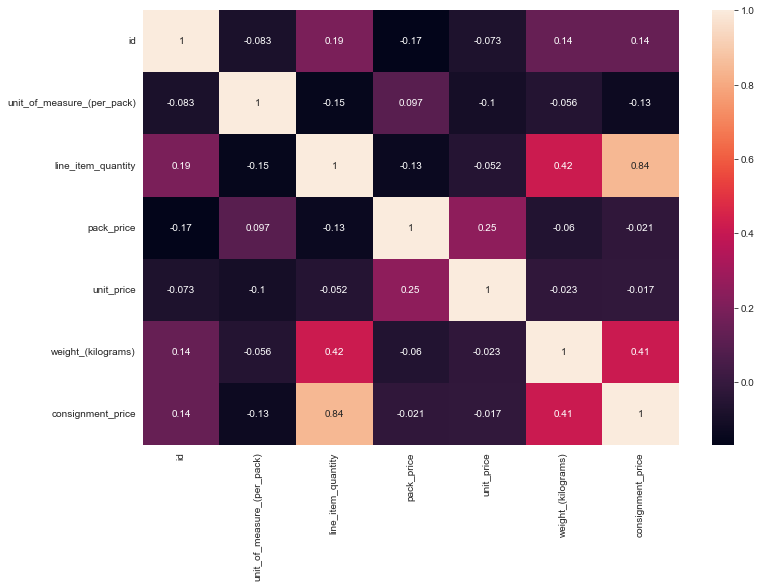

In [154]:
#Using Pearson Correlation
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(),annot=True)
plt.show()

### Inferences

 - Line item quantity and consignment price have a positive corelation of 0.84

In [155]:
df2.sample()

id project_code    pq_# po_/_so_# asn/dn_#  country managed_by  \
7124  82923   151-NG-T30  others        SO       DN  Nigeria   PMO - US   

     fulfill_via vendor_inco_term shipment_mode pq_first_sent_to_client_date  \
7124    From RDC   N/A - From RDC   Air Charter          2010-05-27 00:00:00   

     po_sent_to_vendor_date scheduled_delivery_date delivered_to_client_date  \
7124         N/A - From RDC              2010-11-18               2010-11-10   

     delivery_recorded_date product_group sub_classification         vendor  \
7124             2010-11-10           ARV              Adult  SCMS from RDC   

                                                                           item_description  \
7124  Efavirenz/Emtricitabine/Tenofovir Disoproxil Fumarate 600/200/300mg, tablets, 30 Tabs   

                                         molecule/test_type    brand  \
7124  Efavirenz/Emtricitabine/Tenofovir Disoproxil Fumarate  Generic   

             dosage   dosage_form  unit_of_measure_(per_pack)  \
7124  600/200/300mg  Tablet - FDC                          30   

      line_item_quantity  pack_price  unit_price manufacturing_site  \
7124               20000    19.92000     0.66000              India   

     first_line_designation  weight_(kilograms)  consignment_price  
7124                    Yes          2181.00000       419523.88000

In [156]:
df2.columns

Index(['id', 'project_code', 'pq_#', 'po_/_so_#', 'asn/dn_#', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'consignment_price'],
      dtype='object')

### Feature Engineering

In [157]:
lr = LabelEncoder()#label encoding for manufacturing site ,country,shipment mode,vender inco term

In [158]:
df2['manufacturing_site']= lr.fit_transform(df2['manufacturing_site'])
df2['country'] = lr.fit_transform(df2['country'])
df2['shipment_mode'] = lr.fit_transform(df2['shipment_mode'])
df2['vendor_inco_term'] = lr.fit_transform(df2['vendor_inco_term'])

In [159]:
df2.columns

Index(['id', 'project_code', 'pq_#', 'po_/_so_#', 'asn/dn_#', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'consignment_price'],
      dtype='object')

### dropping the features 

In [160]:
df2.drop(labels=['id', 'project_code', 'pq_#', 'po_/_so_#', 'asn/dn_#','pq_first_sent_to_client_date', 'po_sent_to_vendor_date','scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form'],axis=1,inplace=True)

In [161]:
df2.shape

(10324, 13)

In [162]:
df2.columns

Index(['country', 'managed_by', 'fulfill_via', 'vendor_inco_term',
       'shipment_mode', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'consignment_price'],
      dtype='object')

In [163]:
df3 = df2.copy()

In [164]:
df2.columns

Index(['country', 'managed_by', 'fulfill_via', 'vendor_inco_term',
       'shipment_mode', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'consignment_price'],
      dtype='object')

In [165]:
df2['managed_by'].value_counts()

PMO - US    10265
others         59
Name: managed_by, dtype: int64

### Onehot encoding

In [166]:
df4 = pd.get_dummies(df3,drop_first=True)

In [167]:
df4.shape

(10324, 13)

In [168]:
df4['unit_of_measure_(per_pack)'] = df4['unit_of_measure_(per_pack)'].replace("(","")

In [169]:
df4 = df4.rename(columns = {'unit_of_measure_(per_pack)':'unit_of_measure_per_pack','weight_(kilograms)':'weight_kilograms'})

In [170]:
df4.head()

country  vendor_inco_term  shipment_mode  unit_of_measure_per_pack  \
0        4                 2              0                        30   
1       12                 2              0                       240   
2        4                 3              0                       100   
3       12                 2              0                        60   
4       12                 2              0                        60   

   line_item_quantity  pack_price  unit_price  manufacturing_site  \
0                  19    29.00000     0.97000                  13   
1                1000     6.20000     0.03000                   4   
2                 500    80.00000     0.80000                  13   
3               31920     3.99000     0.07000                  13   
4               38000     3.20000     0.05000                   4   

   weight_kilograms  consignment_price  managed_by_others  \
0          13.00000         1331.34000                  0   
1         358.00000        10721.50000                  0   
2         171.00000        41653.78000                  0   
3        1855.00000       143367.86000                  0   
4        7590.00000       167050.08000                  0   

   fulfill_via_From RDC  first_line_designation_Yes  
0                     0                           1  
1                     0                           1  
2                     0                           1  
3                     0                           1  
4                     0                           1

In [171]:
df4.columns

Index(['country', 'vendor_inco_term', 'shipment_mode',
       'unit_of_measure_per_pack', 'line_item_quantity', 'pack_price',
       'unit_price', 'manufacturing_site', 'weight_kilograms',
       'consignment_price', 'managed_by_others', 'fulfill_via_From RDC',
       'first_line_designation_Yes'],
      dtype='object')

In [172]:
df4.rename(columns={'fulfill_via_From RDC':'fulfill_via_From_RDC'},inplace=True)

In [173]:
df5 = df4.copy()

In [174]:
df5.shape

(10324, 13)

### Preprocessing using minmax scaler

In [175]:
from sklearn.preprocessing import MinMaxScaler
X = df5.drop('consignment_price',axis=1)
y = df5['consignment_price']

features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
X.head()

country  vendor_inco_term  shipment_mode  unit_of_measure_per_pack  \
0  0.26667           0.40000        0.00000                   0.02903   
1  0.80000           0.40000        0.00000                   0.23924   
2  0.26667           0.60000        0.00000                   0.09910   
3  0.80000           0.40000        0.00000                   0.05906   
4  0.80000           0.40000        0.00000                   0.05906   

   line_item_quantity  pack_price  unit_price  manufacturing_site  \
0             0.00003     0.02155     0.00406             1.00000   
1             0.00161     0.00461     0.00013             0.30769   
2             0.00080     0.05945     0.00335             1.00000   
3             0.05148     0.00297     0.00029             1.00000   
4             0.06129     0.00238     0.00021             0.30769   

   weight_kilograms  managed_by_others  fulfill_via_From_RDC  \
0           0.00002            0.00000               0.00000   
1           0.00042            0.00000               0.00000   
2           0.00020            0.00000               0.00000   
3           0.00216            0.00000               0.00000   
4           0.00885            0.00000               0.00000   

   first_line_designation_Yes  
0                     1.00000  
1                     1.00000  
2                     1.00000  
3                     1.00000  
4                     1.00000

### Function for train and test split

In [176]:
def train_and_test_split(data,t_col,testsize = 0.2,randomstate = 42):
    X = data
    y = t_col
    return train_test_split(X,y,test_size = testsize,random_state=randomstate)

### Function for building up the model

In [177]:
def model_builder(model_name,model,data,t_col):
    X_train, X_test,y_train,y_test = train_and_test_split(data,t_col)
    model.fit(X_train,y_train)
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    r2_test = r2_score(y_test,y_test_pred)
    r2_train = r2_score(y_train,y_train_pred)
    n_train,n_test = X_train.shape[0],X_test.shape[0]
    k_train,k_test = X_train.shape[1],X_test.shape[1]
    adj_r2_train=1-(1-r2_train)*(n_train-1)/(n_train-k_train*1)
    adj_r2_test=1-(1-r2_test)*(n_test-1)/(n_test-k_test*1)
    rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
    rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
    result = [model_name,rmse_train,r2_train,adj_r2_train,rmse_test,r2_test,adj_r2_test]
    return result

### Function for running model models of regression 

In [178]:
def multiple_models(data,t_col):
    col_names = ['Model Name','RMSE _train','R2 Score test','Adj R2 Score Train','RMSE_test','R2 Score train','Adj R2 Score Test']
    result = pd.DataFrame(columns=col_names)
    result.loc[len(result)] = model_builder('LinearRegression',LinearRegression(),data,t_col)
    result.loc[len(result)] = model_builder('Lasso Regression',Lasso(),data,t_col)
    result.loc[len(result)] = model_builder('Ridge Regression',Ridge(),data,t_col)
    result.loc[len(result)] = model_builder('DTR',DecisionTreeRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('SVR',SVR(),data,t_col)
    result.loc[len(result)] = model_builder('RandomForestRegressor',RandomForestRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('KNN',KNeighborsRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('GBoost',GradientBoostingRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('XGBoost',XGBRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('AdaBoost',AdaBoostRegressor(),data,t_col)
    return result.sort_values('R2 Score test', ascending=False)

In [179]:
multiple_models(X,y)# calling out all the functions

Model Name  RMSE _train  R2 Score test  Adj R2 Score Train  \
3                    DTR    675.53561        1.00000             1.00000   
8                XGBoost   7071.97551        0.99961             0.99961   
5  RandomForestRegressor  15590.27530        0.99813             0.99813   
7                 GBoost  24157.41474        0.99550             0.99550   
9               AdaBoost 136999.68894        0.85542             0.85523   
6                    KNN 139196.17930        0.85075             0.85055   
0       LinearRegression 185939.13901        0.73368             0.73333   
1       Lasso Regression 185939.16733        0.73368             0.73333   
2       Ridge Regression 186296.79935        0.73266             0.73230   
4                    SVR 383091.81112       -0.13047            -0.13198   

     RMSE_test  R2 Score train  Adj R2 Score Test  
3  35341.35566         0.98774            0.98767  
8  25617.68264         0.99356            0.99352  
5  27031.59751         0.99283            0.99279  
7  31705.70472         0.99013            0.99008  
9 136424.78493         0.81730            0.81632  
6 170310.40587         0.71526            0.71374  
0 187225.88525         0.65589            0.65405  
1 187222.79126         0.65591            0.65406  
2 184625.30270         0.66539            0.66359  
4 341081.26623        -0.14202           -0.14814

### Observation:
 - Among all these models XG boost and Random Forest is having less errors comparing with root means square score

In [180]:
df6 = df5.copy()

In [181]:
df6.head()

country  vendor_inco_term  shipment_mode  unit_of_measure_per_pack  \
0        4                 2              0                        30   
1       12                 2              0                       240   
2        4                 3              0                       100   
3       12                 2              0                        60   
4       12                 2              0                        60   

   line_item_quantity  pack_price  unit_price  manufacturing_site  \
0                  19    29.00000     0.97000                  13   
1                1000     6.20000     0.03000                   4   
2                 500    80.00000     0.80000                  13   
3               31920     3.99000     0.07000                  13   
4               38000     3.20000     0.05000                   4   

   weight_kilograms  consignment_price  managed_by_others  \
0          13.00000         1331.34000                  0   
1         358.00000        10721.50000                  0   
2         171.00000        41653.78000                  0   
3        1855.00000       143367.86000                  0   
4        7590.00000       167050.08000                  0   

   fulfill_via_From_RDC  first_line_designation_Yes  
0                     0                           1  
1                     0                           1  
2                     0                           1  
3                     0                           1  
4                     0                           1

In [182]:
X = df6.drop('consignment_price',axis=1)
y = df6['consignment_price']

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((8259, 12), (2065, 12))

### Applying Hyper tuning parameter for Random forest with Randomized search CV

In [184]:
rfr = RandomForestRegressor()

In [185]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec,2)))

In [186]:
params = {'n_estimators': [100, 200, 300,400],
          'max_depth':[2,5,10,20],
          'min_samples_split':[2,4,8,12],
          'min_samples_leaf':[2,4,8,10]}

# randomized search cv
RCV = RandomizedSearchCV(estimator=rfr, 
                         param_distributions=params, 
                         n_iter = 10,  
                         scoring='r2', 
                         cv = 5, 
                         verbose=2, 
                         random_state=42, 
                         n_jobs=-1, 
                         return_train_score=True)
# Fit the randomized search CV object to the data
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
RCV.fit(X_train,y_train)
timer(start_time)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

 Time taken: 0 hours 2 minutes and 11.62 seconds.


In [187]:
RCV.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=12,
                      n_estimators=300)

In [188]:
RCV.best_params_

{'n_estimators': 300,
 'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_depth': 20}

In [189]:
RCV.best_score_

0.979324535876672

In [190]:
RCV.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 5, 10, 20],
                                        'min_samples_leaf': [2, 4, 8, 10],
                                        'min_samples_split': [2, 4, 8, 12],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=2)>

In [191]:
train_predictions = RCV.predict(X_train)
print("Predicted train value :", train_predictions)

Predicted train value : [   251.62485919  31436.47080768 149602.28202773 ...  31945.53897927
  67863.40189281  67441.45845973]


In [192]:
test_predictions = RCV.predict(X_test)
print("Predicted test value:", test_predictions)

Predicted test value: [315156.4890844   11585.88510104   1502.64550945 ...  79676.73667348
  55422.81174624   5156.91808299]


In [193]:
X_test.head()

country  vendor_inco_term  shipment_mode  unit_of_measure_per_pack  \
6584       13                 4              3                        30   
1692        1                 4              0                        30   
2692        8                 1              3                        60   
7702        6                 4              1                        30   
321         5                 2              0                       100   

      line_item_quantity  pack_price  unit_price  manufacturing_site  \
6584               47227     5.78000     0.19000                   4   
1692                 535    17.00000     0.57000                  13   
2692                  25    49.85000     0.83000                   4   
7702                1161     5.54000     0.18000                  13   
321                 4200     0.01000     0.00000                   7   

      weight_kilograms  managed_by_others  fulfill_via_From_RDC  \
6584        4959.00000                  0                     1   
1692          33.00000                  0                     1   
2692           0.00000                  0                     0   
7702        2566.00000                  0                     1   
321            0.00000                  0                     0   

      first_line_designation_Yes  
6584                           1  
1692                           1  
2692                           1  
7702                           1  
321                            1

In [194]:
RCV.predict([[13,4,3,30,47227,5.78000,0.19000,4,4959.00000,0,1,1]])

array([315156.4890844])

In [195]:
X_train.head()

country  vendor_inco_term  shipment_mode  unit_of_measure_per_pack  \
3381         8                 1              3                        30   
10195        4                 4              3                        30   
5065        12                 2              0                        30   
8398         7                 4              3                        60   
828          8                 1              3                       300   

       line_item_quantity  pack_price  unit_price  manufacturing_site  \
3381                   11    21.83000     0.73000                   4   
10195                6000     4.00000     0.13000                   4   
5065                15552     9.50000     0.32000                   4   
8398                34858     6.52000     0.11000                   4   
828                    10    35.46000     0.12000                  12   

       weight_kilograms  managed_by_others  fulfill_via_From_RDC  \
3381            0.00000                  0                     0   
10195         243.00000                  0                     1   
5065            0.00000                  0                     0   
8398         3094.00000                  0                     1   
828             0.00000                  0                     0   

       first_line_designation_Yes  
3381                            0  
10195                           1  
5065                            0  
8398                            1  
828                             0

In [196]:
RCV.predict([[13,4,3,30,47227,5.78000,0.19000,4,4959.00000,0,1,1]])

array([315156.4890844])

In [197]:
"""print('r2score_train:', r2_score(y_train, train_predictions))
print('r2score_test:', r2_score(y_test, test_predictions))
print('MAE:', mean_absolute_error(y_test, test_predictions))
print('MSE:', mean_squared_error(y_test, test_predictions))
print('RMSE train',np.sqrt(mean_squared_error(y_train,train_predictions)))
print('RMSE test',np.sqrt(mean_squared_error(y_test,test_predictions)))"""

"print('r2score_train:', r2_score(y_train, train_predictions))\nprint('r2score_test:', r2_score(y_test, test_predictions))\nprint('MAE:', mean_absolute_error(y_test, test_predictions))\nprint('MSE:', mean_squared_error(y_test, test_predictions))\nprint('RMSE train',np.sqrt(mean_squared_error(y_train,train_predictions)))\nprint('RMSE test',np.sqrt(mean_squared_error(y_test,test_predictions)))"

In [198]:
def adjusted_r2(data,true,pred):
    r2=r2_score(true,pred)
    n = data.shape[0]
    p = data.shape[1]
    adj_r2=1-(1-r2)*(n-1)/(n-p*1)
    return adj_r2

In [199]:
def accuracy_metrics(test,pred,type_):
    r2=r2_score(test,pred)
    rmse=np.sqrt(mean_squared_error(test,pred))
    if r2:
        print("The r2 score for {} is {}%".format(type_,(r2*100)))
        print("RMSE score for {} is {}".format(type_,(rmse)))
#       print("adjusted r2 score is {}%".format(adj_r2*100))
    return None

In [200]:
#for test accuracy
accuracy_metrics(y_test, test_predictions,"test")

The r2 score for test is 99.00323764918993%
RMSE score for test is 31865.145614428842


In [201]:
#for train accuracy
accuracy_metrics(y_train, train_predictions,"train")

The r2 score for train is 99.06917901066005%
RMSE score for train is 34762.08763272647


In [202]:
def rmse(y_true,y_pred):
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    return rmse

In [203]:
results = pd.DataFrame(columns = ['Algorithm','Train_R2 score','Train_Adj_R2 score','Train_RMSE score',
                                 'Test_R2 score','Test_Adj_R2 score','Test_RMSE score'])

In [204]:
results.loc[len(results)] = ['Random Forest Regressor',r2_score(y_train, train_predictions),
                             adjusted_r2(X_train,y_train, train_predictions),
                             rmse(y_train, train_predictions),r2_score(y_test, test_predictions),
                             adjusted_r2(X_test,y_test, test_predictions),rmse(y_test, test_predictions)]

In [205]:
results

Algorithm  Train_R2 score  Train_Adj_R2 score  \
0  Random Forest Regressor         0.99069             0.99068   

   Train_RMSE score  Test_R2 score  Test_Adj_R2 score  Test_RMSE score  
0       34762.08763        0.99003            0.98998      31865.14561

In [206]:
RCV.feature_names_in_

array(['country', 'vendor_inco_term', 'shipment_mode',
       'unit_of_measure_per_pack', 'line_item_quantity', 'pack_price',
       'unit_price', 'manufacturing_site', 'weight_kilograms',
       'managed_by_others', 'fulfill_via_From_RDC',
       'first_line_designation_Yes'], dtype=object)

In [207]:
import pickle

In [208]:
pickle.dump(RCV,open('data.pkl', 'wb'))

In [209]:
#pickle.dump(n,open('columns.pkl', 'wb'))